In [1]:
#data source
#https://search.earthdata.nasa.gov/search/granules?p=C1940475563-POCLOUD&pg[0][v]=f&pg[0][gsk]=start_date&g=G1996941394-POCLOUD&tl=1666010677.42!3!!&lat=78.609375&long=0.140625&zoom=1


#https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MODIS_T-JPL-L2P-v2019.0/20000224003506-JPL-L2P_GHRSST-SSTskin-MODIS_T-D-v02.0-fv01.0.nc
#https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MODIS_T-JPL-L2P-v2019.0/20000224000006-JPL-L2P_GHRSST-SSTskin-MODIS_T-N-v02.0-fv01.0.nc


#https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html


In [4]:

from ipynb.fs.full.utils import *
from glob import glob
import os
import requests
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt



In [35]:

fn = '/home/fun/sst/sst.day.mean.2005.v2.nc'
ds = nc.Dataset(fn)


print(ds)
#print(ds.__dict__)
# for dim in ds.dimensions.values():
#     print(dim)
    
# for var in ds.variables.values():
#     print(var)
    
    
sst = ds['sst']


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA High-resolution Blended Analysis: Daily Values using AVHRR only
    institution: NOAA/NCDC
    source: NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment: Reynolds, et al., 2007: Daily High-Resolution-Blended Analyses for Sea Surface Temperature. J. Climate, 20, 5473-5496.  Climatology is based on 1971-2000 OI.v2 SST, Satellite data: Navy NOAA17 NOAA18 AVHRR, Ice data: NCEP ice.
    history: Thu Aug 24 13:47:23 2017: ncatted -O -a References,global,d,, sst.day.mean.2005.v2.nc
Version 1.0
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    dimensions(sizes): time(365), lat(720), lon(1440)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 sst(time, lat, lon)
    groups: 


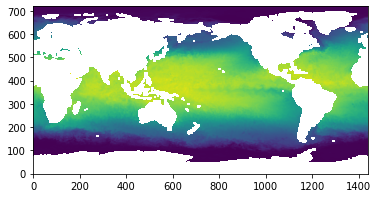

In [46]:
#plt.imshow(getTgtArea(sst[283], -1 * float('12.8'), float('37.7'), 12.5))
plt.imshow(sst[283])
plt.gca().invert_yaxis()

In [5]:
def date_to_nth_day(date, fmt='%Y%m%d'):
    date = datetime.datetime.strptime(date, fmt)
    new_year_day = datetime.datetime(year=date.year, month=1, day=1)
    return (date - new_year_day).days


def getTgtArea(rgb, lon, lat, radias):
    '''
    lat (-90, 90)
    lon (0, E(0, 180), W(0, 180))
    '''
    n = 720
    m = 1440
    
    interval = 180.0 / n
    
    lat_index = int((90 + lat) / interval)

    long_index = int((lon + 360) / interval) # only works for West
    
    n_raidus = int(radias / interval)
    
    
    return rgb[lat_index - n_raidus:lat_index + n_raidus, long_index - n_raidus:long_index + n_raidus]
def generate_noaa_filename(datestr):
    '''
    compose url using date  'YYYYMMDD'
    '''
    fname = '/home/fun/sst/sst.day.mean.' + datestr[0:4] + '.v2.nc'
    return fname
    #datestr[4:6] + '/' + datestr[6:8]
    
def post_processing(folder, sst, clip):
    idx = date_to_nth_day(str(clip['date']))  
    area = getTgtArea(sst[idx], -1 * float(clip['lg'][:-1]), float(clip['lt'][:-1]), 25)
    
    final = np.array([area])
    pathname = folder + '/noaa_sst_' + str(clip['date']) + '.npy'
    np.save(pathname, final)
    
def download_noaa(folder):
    json_profile = folder + '/profile.json'
    json_file = open(json_profile)
    d = json.load(json_file)
        
    for it in d['path']:
        print(it)
        fname = generate_noaa_filename(str(it['date']))
        
        ds = nc.Dataset(fname)
        sst = ds['sst']
        post_processing(folder, sst, it)
        


In [ ]:

hurricanes_folders = glob("/home/fun/data/AL*20*", recursive = True)


for it in hurricanes_folders:
    sst = download_noaa(it)


{'date': 20040803, 'time': '1200', 'category': 'TD', 'lt': '12.9N', 'lg': '53.6W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040803, 'time': '1800', 'category': 'TD', 'lt': '13.2N', 'lg': '55.4W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040804, 'time': '0000', 'category': 'TD', 'lt': '13.5N', 'lg': '57.4W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040804, 'time': '0600', 'c

{'date': 20040815, 'time': '0600', 'category': 'HU', 'lt': '14.1N', 'lg': '30.8W', 'maxwind': '75', 'maxpres': '981', '34ktne': '120', '34ktse': '75', '34ktsw': '75', '34ktnw': '75', '50ktne': '100', '50ktse': '50', '50ktsw': '40', '50ktnw': '40', '64ktne': '50', '64ktse': '25', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '25'}
{'date': 20040815, 'time': '1200', 'category': 'HU', 'lt': '14.7N', 'lg': '32.1W', 'maxwind': '80', 'maxpres': '978', '34ktne': '120', '34ktse': '75', '34ktsw': '75', '34ktnw': '75', '50ktne': '120', '50ktse': '75', '50ktsw': '40', '50ktnw': '40', '64ktne': '75', '64ktse': '25', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '25'}
{'date': 20040815, 'time': '1800', 'category': 'HU', 'lt': '15.2N', 'lg': '33.5W', 'maxwind': '85', 'maxpres': '975', '34ktne': '120', '34ktse': '75', '34ktsw': '75', '34ktnw': '75', '50ktne': '120', '50ktse': '60', '50ktsw': '40', '50ktnw': '40', '64ktne': '60', '64ktse': '25', '64ktsw': '25', '64ktnw': '20', 'maxwindradius': '

{'date': 20040827, 'time': '1800', 'category': 'TD', 'lt': '31.6N', 'lg': '78.0W', 'maxwind': '25', 'maxpres': '1014', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040828, 'time': '0000', 'category': 'TD', 'lt': '31.4N', 'lg': '78.0W', 'maxwind': '30', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040828, 'time': '0600', 'category': 'TS', 'lt': '31.3N', 'lg': '78.2W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '0', '34ktse': '50', '34ktsw': '50', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040828, 'time': '1200', 

{'date': 20060905, 'time': '0600', 'category': 'TS', 'lt': '16.8N', 'lg': '46.1W', 'maxwind': '35', 'maxpres': '1007', '34ktne': '100', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060905, 'time': '1200', 'category': 'TS', 'lt': '17.0N', 'lg': '46.9W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '100', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060905, 'time': '1800', 'category': 'TS', 'lt': '17.3N', 'lg': '47.8W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '110', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060906, 'time': '

{'date': 20060911, 'time': '1800', 'category': 'HU', 'lt': '33.6N', 'lg': '65.0W', 'maxwind': '75', 'maxpres': '974', '34ktne': '250', '34ktse': '205', '34ktsw': '205', '34ktnw': '165', '50ktne': '270', '50ktse': '100', '50ktsw': '100', '50ktnw': '95', '64ktne': '80', '64ktse': '60', '64ktsw': '60', '64ktnw': '30', 'maxwindradius': '30'}
{'date': 20060912, 'time': '0000', 'category': 'HU', 'lt': '34.9N', 'lg': '64.1W', 'maxwind': '70', 'maxpres': '975', '34ktne': '250', '34ktse': '240', '34ktsw': '240', '34ktnw': '240', '50ktne': '360', '50ktse': '120', '50ktsw': '120', '50ktnw': '150', '64ktne': '120', '64ktse': '60', '64ktsw': '60', '64ktnw': '30', 'maxwindradius': '30'}
{'date': 20060912, 'time': '0600', 'category': 'HU', 'lt': '36.3N', 'lg': '63.2W', 'maxwind': '65', 'maxpres': '976', '34ktne': '300', '34ktse': '270', '34ktsw': '270', '34ktnw': '240', '50ktne': '360', '50ktse': '120', '50ktsw': '120', '50ktnw': '135', '64ktne': '120', '64ktse': '60', '64ktsw': '60', '64ktnw': '30',

{'date': 20060918, 'time': '0600', 'category': 'EX', 'lt': '63.0N', 'lg': '26.5W', 'maxwind': '50', 'maxpres': '977', '34ktne': '420', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '420', '50ktse': '360', '50ktsw': '0', '50ktnw': '0', '64ktne': '300', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060918, 'time': '1200', 'category': 'EX', 'lt': '63.0N', 'lg': '29.0W', 'maxwind': '50', 'maxpres': '978', '34ktne': '420', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '420', '50ktse': '300', '50ktsw': '0', '50ktnw': '0', '64ktne': '300', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060918, 'time': '1800', 'category': 'EX', 'lt': '63.0N', 'lg': '31.4W', 'maxwind': '50', 'maxpres': '979', '34ktne': '420', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '420', '50ktse': '300', '50ktsw': '0', '50ktnw': '0', '64ktne': '300', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2006091

{'date': 20000809, 'time': '0600', 'category': 'TS', 'lt': '20.6N', 'lg': '48.5W', 'maxwind': '60', 'maxpres': '992', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000809, 'time': '1200', 'category': 'TS', 'lt': '21.9N', 'lg': '49.9W', 'maxwind': '55', 'maxpres': '994', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000809, 'time': '1800', 'category': 'TS', 'lt': '23.4N', 'lg': '51.3W', 'maxwind': '60', 'maxpres': '991', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20000815, 'time': '1800', 'category': 'TS', 'lt': '36.6N', 'lg': '38.9W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000816, 'time': '0000', 'category': 'TS', 'lt': '36.1N', 'lg': '39.4W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000816, 'time': '0600', 'category': 'TS', 'lt': '35.4N', 'lg': '40.2W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20000822, 'time': '0000', 'category': 'HU', 'lt': '41.2N', 'lg': '45.9W', 'maxwind': '75', 'maxpres': '979', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000822, 'time': '0600', 'category': 'HU', 'lt': '42.6N', 'lg': '45.4W', 'maxwind': '75', 'maxpres': '981', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000822, 'time': '1200', 'category': 'HU', 'lt': '44.0N', 'lg': '44.0W', 'maxwind': '70', 'maxpres': '983', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20000810, 'time': '1800', 'category': 'TD', 'lt': '28.9N', 'lg': '78.3W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000811, 'time': '0000', 'category': 'TD', 'lt': '29.2N', 'lg': '77.8W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000811, 'time': '0600', 'category': 'TD', 'lt': '29.4N', 'lg': '77.2W', 'maxwind': '25', 'maxpres': '1012', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20000820, 'time': '0000', 'category': 'TD', 'lt': '12.6N', 'lg': '45.3W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000820, 'time': '0600', 'category': 'TS', 'lt': '13.3N', 'lg': '46.8W', 'maxwind': '35', 'maxpres': '1009', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000820, 'time': '1200', 'category': 'TS', 'lt': '14.0N', 'lg': '48.8W', 'maxwind': '40', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20000915, 'time': '0600', 'category': 'TS', 'lt': '29.1N', 'lg': '72.4W', 'maxwind': '45', 'maxpres': '996', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000915, 'time': '1200', 'category': 'TS', 'lt': '29.8N', 'lg': '71.2W', 'maxwind': '50', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000915, 'time': '1800', 'category': 'TS', 'lt': '30.1N', 'lg': '69.7W', 'maxwind': '60', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20000918, 'time': '0600', 'category': 'WV', 'lt': '17.1N', 'lg': '68.7W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000918, 'time': '1200', 'category': 'WV', 'lt': '17.2N', 'lg': '70.6W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000918, 'time': '1800', 'category': 'WV', 'lt': '17.4N', 'lg': '72.5W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20000924, 'time': '0600', 'category': 'HU', 'lt': '15.1N', 'lg': '35.8W', 'maxwind': '100', 'maxpres': '960', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000924, 'time': '1200', 'category': 'HU', 'lt': '15.5N', 'lg': '36.8W', 'maxwind': '100', 'maxpres': '960', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000924, 'time': '1800', 'category': 'HU', 'lt': '15.8N', 'lg': '37.8W', 'maxwind': '100', 'maxpres': '960', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20001001, 'time': '0000', 'category': 'HU', 'lt': '39.7N', 'lg': '47.9W', 'maxwind': '65', 'maxpres': '987', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001001, 'time': '0600', 'category': 'TS', 'lt': '40.9N', 'lg': '45.7W', 'maxwind': '60', 'maxpres': '990', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001001, 'time': '1200', 'category': 'TS', 'lt': '42.1N', 'lg': '43.6W', 'maxwind': '55', 'maxpres': '990', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20000927, 'time': '1800', 'category': 'HU', 'lt': '12.5N', 'lg': '40.1W', 'maxwind': '70', 'maxpres': '978', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000928, 'time': '0000', 'category': 'HU', 'lt': '12.4N', 'lg': '41.3W', 'maxwind': '75', 'maxpres': '976', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000928, 'time': '0600', 'category': 'HU', 'lt': '12.2N', 'lg': '42.5W', 'maxwind': '80', 'maxpres': '975', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20000930, 'time': '0600', 'category': 'TS', 'lt': '17.9N', 'lg': '86.0W', 'maxwind': '55', 'maxpres': '987', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000930, 'time': '1200', 'category': 'HU', 'lt': '17.9N', 'lg': '86.4W', 'maxwind': '65', 'maxpres': '982', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20000930, 'time': '1800', 'category': 'HU', 'lt': '17.9N', 'lg': '86.7W', 'maxwind': '75', 'maxpres': '977', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20001008, 'time': '0000', 'category': 'EX', 'lt': '40.0N', 'lg': '64.0W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001008, 'time': '0600', 'category': 'EX', 'lt': '43.0N', 'lg': '60.0W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001008, 'time': '1200', 'category': 'EX', 'lt': '46.0N', 'lg': '57.0W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20001018, 'time': '0600', 'category': 'HU', 'lt': '30.8N', 'lg': '70.8W', 'maxwind': '65', 'maxpres': '986', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001018, 'time': '1200', 'category': 'HU', 'lt': '31.5N', 'lg': '70.4W', 'maxwind': '65', 'maxpres': '984', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001018, 'time': '1800', 'category': 'HU', 'lt': '32.6N', 'lg': '69.5W', 'maxwind': '70', 'maxpres': '979', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20001026, 'time': '0000', 'category': 'SS', 'lt': '25.7N', 'lg': '71.7W', 'maxwind': '35', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001026, 'time': '0600', 'category': 'SS', 'lt': '26.6N', 'lg': '71.7W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20001026, 'time': '1200', 'category': 'SS', 'lt': '27.4N', 'lg': '71.8W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20010815, 'time': '0600', 'category': 'TD', 'lt': '12.6N', 'lg': '41.6W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010815, 'time': '1200', 'category': 'TD', 'lt': '12.3N', 'lg': '43.9W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010815, 'time': '1800', 'category': 'TD', 'lt': '12.3N', 'lg': '46.3W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20010822, 'time': '1200', 'category': 'TS', 'lt': '17.9N', 'lg': '64.3W', 'maxwind': '45', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010822, 'time': '1800', 'category': 'TS', 'lt': '19.1N', 'lg': '65.9W', 'maxwind': '50', 'maxpres': '1009', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010823, 'time': '0000', 'category': 'TS', 'lt': '19.8N', 'lg': '67.4W', 'maxwind': '50', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20010828, 'time': '0600', 'category': 'TS', 'lt': '43.5N', 'lg': '56.0W', 'maxwind': '55', 'maxpres': '996', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010828, 'time': '1200', 'category': 'TS', 'lt': '44.0N', 'lg': '53.4W', 'maxwind': '50', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010828, 'time': '1800', 'category': 'EX', 'lt': '45.5N', 'lg': '50.5W', 'maxwind': '45', 'maxpres': '998', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20010906, 'time': '0600', 'category': 'LO', 'lt': '21.2N', 'lg': '58.2W', 'maxwind': '15', 'maxpres': '1015', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010906, 'time': '1200', 'category': 'LO', 'lt': '22.2N', 'lg': '58.3W', 'maxwind': '20', 'maxpres': '1014', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010906, 'time': '1800', 'category': 'TD', 'lt': '23.2N', 'lg': '58.4W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20010912, 'time': '1800', 'category': 'HU', 'lt': '37.9N', 'lg': '62.0W', 'maxwind': '75', 'maxpres': '979', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010913, 'time': '0000', 'category': 'HU', 'lt': '38.1N', 'lg': '61.4W', 'maxwind': '75', 'maxpres': '979', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010913, 'time': '0600', 'category': 'HU', 'lt': '38.3N', 'lg': '61.0W', 'maxwind': '70', 'maxpres': '982', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20010915, 'time': '0600', 'category': 'HU', 'lt': '31.5N', 'lg': '41.4W', 'maxwind': '90', 'maxpres': '970', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010915, 'time': '1200', 'category': 'HU', 'lt': '31.7N', 'lg': '39.5W', 'maxwind': '90', 'maxpres': '970', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010915, 'time': '1800', 'category': 'HU', 'lt': '32.1N', 'lg': '37.6W', 'maxwind': '85', 'maxpres': '975', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20010913, 'time': '1800', 'category': 'TS', 'lt': '25.4N', 'lg': '84.5W', 'maxwind': '40', 'maxpres': '998', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010914, 'time': '0000', 'category': 'TS', 'lt': '25.4N', 'lg': '84.1W', 'maxwind': '45', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20010914, 'time': '0600', 'category': 'TS', 'lt': '25.8N', 'lg': '83.6W', 'maxwind': '50', 'maxpres': '992', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20011008, 'time': '0600', 'category': 'HU', 'lt': '17.2N', 'lg': '82.3W', 'maxwind': '90', 'maxpres': '963', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011008, 'time': '1200', 'category': 'HU', 'lt': '17.1N', 'lg': '84.0W', 'maxwind': '120', 'maxpres': '950', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011008, 'time': '1800', 'category': 'HU', 'lt': '16.8N', 'lg': '86.0W', 'maxwind': '115', 'maxpres': '950', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', 

{'date': 20011015, 'time': '0000', 'category': 'TS', 'lt': '40.9N', 'lg': '64.4W', 'maxwind': '50', 'maxpres': '995', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011015, 'time': '0600', 'category': 'TS', 'lt': '42.3N', 'lg': '65.0W', 'maxwind': '45', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011027, 'time': '1200', 'category': 'TD', 'lt': '27.2N', 'lg': '34.9W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '

{'date': 20011031, 'time': '0000', 'category': 'TD', 'lt': '13.7N', 'lg': '83.6W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011031, 'time': '0600', 'category': 'TD', 'lt': '14.3N', 'lg': '83.4W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011031, 'time': '1200', 'category': 'TD', 'lt': '14.8N', 'lg': '83.2W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20011106, 'time': '1200', 'category': 'EX', 'lt': '27.3N', 'lg': '69.7W', 'maxwind': '65', 'maxpres': '984', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011106, 'time': '1800', 'category': 'EX', 'lt': '28.7N', 'lg': '66.5W', 'maxwind': '55', 'maxpres': '989', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011104, 'time': '0000', 'category': 'SS', 'lt': '33.9N', 'lg': '50.4W', 'maxwind': '45', 'maxpres': '988', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20011127, 'time': '0600', 'category': 'HU', 'lt': '32.6N', 'lg': '57.0W', 'maxwind': '80', 'maxpres': '973', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011127, 'time': '1200', 'category': 'HU', 'lt': '31.5N', 'lg': '57.2W', 'maxwind': '80', 'maxpres': '974', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011127, 'time': '1800', 'category': 'HU', 'lt': '32.0N', 'lg': '56.0W', 'maxwind': '75', 'maxpres': '975', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20011204, 'time': '0000', 'category': 'TD', 'lt': '27.7N', 'lg': '69.1W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011204, 'time': '0600', 'category': 'TD', 'lt': '27.8N', 'lg': '68.2W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20011204, 'time': '1200', 'category': 'TD', 'lt': '27.8N', 'lg': '68.0W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020830, 'time': '0600', 'category': 'TS', 'lt': '10.0N', 'lg': '34.5W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020830, 'time': '1200', 'category': 'TS', 'lt': '10.3N', 'lg': '36.3W', 'maxwind': '50', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020830, 'time': '1800', 'category': 'TS', 'lt': '10.8N', 'lg': '37.7W', 'maxwind': '50', 'maxpres': '1000', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', 

{'date': 20020903, 'time': '0600', 'category': 'TS', 'lt': '30.4N', 'lg': '78.5W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020903, 'time': '1200', 'category': 'TS', 'lt': '30.4N', 'lg': '78.4W', 'maxwind': '55', 'maxpres': '1002', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020903, 'time': '1800', 'category': 'TS', 'lt': '30.0N', 'lg': '79.0W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020910, 'time': '0600', 'category': 'SS', 'lt': '33.0N', 'lg': '75.5W', 'maxwind': '50', 'maxpres': '990', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020910, 'time': '1200', 'category': 'TS', 'lt': '33.7N', 'lg': '75.4W', 'maxwind': '50', 'maxpres': '987', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020910, 'time': '1800', 'category': 'TS', 'lt': '35.0N', 'lg': '75.4W', 'maxwind': '55', 'maxpres': '985', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20020916, 'time': '0600', 'category': 'WV', 'lt': '15.0N', 'lg': '71.9W', 'maxwind': '20', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020916, 'time': '1200', 'category': 'WV', 'lt': '15.5N', 'lg': '73.2W', 'maxwind': '20', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020916, 'time': '1800', 'category': 'WV', 'lt': '15.7N', 'lg': '74.5W', 'maxwind': '20', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020922, 'time': '0600', 'category': 'HU', 'lt': '22.0N', 'lg': '87.4W', 'maxwind': '110', 'maxpres': '936', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020922, 'time': '1200', 'category': 'HU', 'lt': '21.9N', 'lg': '88.2W', 'maxwind': '110', 'maxpres': '934', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020922, 'time': '1800', 'category': 'HU', 'lt': '21.6N', 'lg': '88.9W', 'maxwind': '110', 'maxpres': '935', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020923, 'time': '1200', 'category': 'TS', 'lt': '32.3N', 'lg': '49.5W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020923, 'time': '1800', 'category': 'TS', 'lt': '31.9N', 'lg': '49.6W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020924, 'time': '0000', 'category': 'TS', 'lt': '31.4N', 'lg': '50.0W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020929, 'time': '1800', 'category': 'TS', 'lt': '28.1N', 'lg': '64.7W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020930, 'time': '0000', 'category': 'TS', 'lt': '28.7N', 'lg': '64.6W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020930, 'time': '0600', 'category': 'TS', 'lt': '29.1N', 'lg': '64.7W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20021006, 'time': '0000', 'category': 'TD', 'lt': '33.2N', 'lg': '70.1W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20021006, 'time': '0600', 'category': 'TD', 'lt': '33.6N', 'lg': '69.7W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20021006, 'time': '1200', 'category': 'TS', 'lt': '33.3N', 'lg': '69.7W', 'maxwind': '35', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020922, 'time': '0000', 'category': 'TD', 'lt': '10.3N', 'lg': '46.5W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020922, 'time': '0600', 'category': 'TD', 'lt': '10.8N', 'lg': '48.5W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020922, 'time': '1200', 'category': 'TD', 'lt': '11.2N', 'lg': '50.4W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20020928, 'time': '0600', 'category': 'TS', 'lt': '17.5N', 'lg': '75.6W', 'maxwind': '45', 'maxpres': '999', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020928, 'time': '1200', 'category': 'TS', 'lt': '18.1N', 'lg': '75.4W', 'maxwind': '45', 'maxpres': '1002', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20020928, 'time': '1800', 'category': 'TS', 'lt': '18.5N', 'lg': '75.7W', 'maxwind': '45', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', 

{'date': 20021014, 'time': '1800', 'category': 'TD', 'lt': '17.2N', 'lg': '83.1W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20021015, 'time': '0000', 'category': 'TD', 'lt': '17.1N', 'lg': '83.2W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20021015, 'time': '0600', 'category': 'TD', 'lt': '17.5N', 'lg': '83.0W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030421, 'time': '0600', 'category': 'TS', 'lt': '30.6N', 'lg': '65.8W', 'maxwind': '50', 'maxpres': '995', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030421, 'time': '1200', 'category': 'TS', 'lt': '30.0N', 'lg': '64.8W', 'maxwind': '50', 'maxpres': '995', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030421, 'time': '1800', 'category': 'TS', 'lt': '29.4N', 'lg': '63.1W', 'maxwind': '50', 'maxpres': '994', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20030707, 'time': '0600', 'category': 'WV', 'lt': '11.8N', 'lg': '55.3W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030707, 'time': '1200', 'category': 'WV', 'lt': '12.6N', 'lg': '57.5W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030707, 'time': '1800', 'category': 'WV', 'lt': '13.2N', 'lg': '59.8W', 'maxwind': '35', 'maxpres': '1010', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030718, 'time': '0000', 'category': 'TS', 'lt': '36.2N', 'lg': '56.4W', 'maxwind': '55', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030718, 'time': '0600', 'category': 'TS', 'lt': '37.1N', 'lg': '56.0W', 'maxwind': '55', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030718, 'time': '1200', 'category': 'TS', 'lt': '38.1N', 'lg': '54.9W', 'maxwind': '60', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030724, 'time': '0000', 'category': 'LO', 'lt': '36.0N', 'lg': '40.5W', 'maxwind': '20', 'maxpres': '1021', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030724, 'time': '0600', 'category': 'LO', 'lt': '36.6N', 'lg': '40.5W', 'maxwind': '20', 'maxpres': '1021', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030724, 'time': '1200', 'category': 'LO', 'lt': '36.5N', 'lg': '40.0W', 'maxwind': '20', 'maxpres': '1021', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030822, 'time': '0600', 'category': 'TD', 'lt': '15.7N', 'lg': '67.5W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030822, 'time': '1200', 'category': 'TD', 'lt': '16.2N', 'lg': '68.2W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030827, 'time': '1800', 'category': 'TD', 'lt': '14.6N', 'lg': '30.7W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030908, 'time': '0600', 'category': 'HU', 'lt': '46.3N', 'lg': '44.7W', 'maxwind': '70', 'maxpres': '977', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030908, 'time': '1200', 'category': 'HU', 'lt': '48.7N', 'lg': '40.8W', 'maxwind': '65', 'maxpres': '980', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030908, 'time': '1800', 'category': 'EX', 'lt': '51.7N', 'lg': '36.0W', 'maxwind': '65', 'maxpres': '980', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20030906, 'time': '1800', 'category': 'TS', 'lt': '13.4N', 'lg': '34.9W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030907, 'time': '0000', 'category': 'TS', 'lt': '13.5N', 'lg': '35.8W', 'maxwind': '55', 'maxpres': '994', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030907, 'time': '0600', 'category': 'TS', 'lt': '13.9N', 'lg': '36.5W', 'maxwind': '60', 'maxpres': '991', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '

{'date': 20030913, 'time': '0600', 'category': 'HU', 'lt': '21.9N', 'lg': '60.1W', 'maxwind': '130', 'maxpres': '935', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030913, 'time': '1200', 'category': 'HU', 'lt': '22.1N', 'lg': '61.0W', 'maxwind': '135', 'maxpres': '935', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030913, 'time': '1800', 'category': 'HU', 'lt': '22.5N', 'lg': '62.1W', 'maxwind': '140', 'maxpres': '932', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030909, 'time': '0600', 'category': 'TD', 'lt': '11.6N', 'lg': '23.6W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030909, 'time': '1200', 'category': 'TD', 'lt': '12.4N', 'lg': '24.4W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030909, 'time': '1800', 'category': 'TD', 'lt': '13.6N', 'lg': '24.9W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20030929, 'time': '0000', 'category': 'HU', 'lt': '42.8N', 'lg': '63.9W', 'maxwind': '85', 'maxpres': '972', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030925, 'time': '1800', 'category': 'TD', 'lt': '11.8N', 'lg': '37.7W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20030926, 'time': '0000', 'category': 'TD', 'lt': '12.8N', 'lg': '38.5W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', 

{'date': 20031001, 'time': '0600', 'category': 'TS', 'lt': '32.4N', 'lg': '38.3W', 'maxwind': '50', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031001, 'time': '1200', 'category': 'TS', 'lt': '32.2N', 'lg': '39.6W', 'maxwind': '55', 'maxpres': '994', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031001, 'time': '1800', 'category': 'HU', 'lt': '31.7N', 'lg': '40.9W', 'maxwind': '65', 'maxpres': '987', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20031008, 'time': '0000', 'category': 'EX', 'lt': '52.0N', 'lg': '44.0W', 'maxwind': '60', 'maxpres': '978', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031008, 'time': '0600', 'category': 'EX', 'lt': '56.5N', 'lg': '40.5W', 'maxwind': '65', 'maxpres': '974', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031008, 'time': '1200', 'category': 'EX', 'lt': '59.5N', 'lg': '37.0W', 'maxwind': '65', 'maxpres': '974', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20031001, 'time': '0600', 'category': 'EX', 'lt': '20.9N', 'lg': '92.9W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031001, 'time': '1200', 'category': 'EX', 'lt': '21.0N', 'lg': '93.0W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031001, 'time': '1800', 'category': 'TS', 'lt': '21.0N', 'lg': '93.2W', 'maxwind': '45', 'maxpres': '1003', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20031012, 'time': '1200', 'category': 'TD', 'lt': '24.7N', 'lg': '72.2W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031012, 'time': '1800', 'category': 'TD', 'lt': '25.5N', 'lg': '72.0W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031013, 'time': '0000', 'category': 'TD', 'lt': '25.6N', 'lg': '71.0W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20031018, 'time': '0600', 'category': 'TS', 'lt': '16.3N', 'lg': '47.9W', 'maxwind': '55', 'maxpres': '994', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031018, 'time': '1200', 'category': 'TS', 'lt': '16.5N', 'lg': '47.8W', 'maxwind': '55', 'maxpres': '994', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031018, 'time': '1800', 'category': 'TS', 'lt': '16.7N', 'lg': '47.7W', 'maxwind': '50', 'maxpres': '997', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '6

{'date': 20031024, 'time': '1800', 'category': 'EX', 'lt': '30.2N', 'lg': '55.7W', 'maxwind': '25', 'maxpres': '1012', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031025, 'time': '0000', 'category': 'EX', 'lt': '31.4N', 'lg': '54.8W', 'maxwind': '20', 'maxpres': '1013', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031025, 'time': '0600', 'category': 'EX', 'lt': '32.2N', 'lg': '53.5W', 'maxwind': '20', 'maxpres': '1014', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20031031, 'time': '0600', 'category': 'LO', 'lt': '28.3N', 'lg': '66.0W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031031, 'time': '1200', 'category': 'LO', 'lt': '27.7N', 'lg': '66.3W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031031, 'time': '1800', 'category': 'LO', 'lt': '27.0N', 'lg': '66.4W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20031209, 'time': '0000', 'category': 'EX', 'lt': '27.4N', 'lg': '57.1W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031209, 'time': '0600', 'category': 'EX', 'lt': '28.9N', 'lg': '54.2W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20031209, 'time': '1200', 'category': 'EX', 'lt': '30.4N', 'lg': '51.1W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999',

{'date': 20040802, 'time': '0600', 'category': 'TS', 'lt': '31.4N', 'lg': '79.4W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '60', '34ktse': '90', '34ktsw': '90', '34ktnw': '90', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040802, 'time': '1200', 'category': 'TS', 'lt': '31.3N', 'lg': '79.0W', 'maxwind': '50', 'maxpres': '992', '34ktne': '75', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '20', '50ktse': '30', '50ktsw': '30', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040802, 'time': '1800', 'category': 'TS', 'lt': '31.8N', 'lg': '78.7W', 'maxwind': '50', 'maxpres': '993', '34ktne': '75', '34ktse': '90', '34ktsw': '90', '34ktnw': '50', '50ktne': '30', '50ktse': '30', '50ktsw': '30', '50ktnw': '20', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040803, 

{'date': 20040811, 'time': '0600', 'category': 'TS', 'lt': '16.0N', 'lg': '73.7W', 'maxwind': '55', 'maxpres': '999', '34ktne': '90', '34ktse': '50', '34ktsw': '50', '34ktnw': '0', '50ktne': '75', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040811, 'time': '1200', 'category': 'TS', 'lt': '16.3N', 'lg': '75.4W', 'maxwind': '60', 'maxpres': '995', '34ktne': '90', '34ktse': '75', '34ktsw': '75', '34ktnw': '0', '50ktne': '75', '50ktse': '40', '50ktsw': '0', '50ktnw': '0', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040811, 'time': '1800', 'category': 'HU', 'lt': '16.7N', 'lg': '76.8W', 'maxwind': '65', 'maxpres': '993', '34ktne': '90', '34ktse': '75', '34ktsw': '75', '34ktnw': '0', '50ktne': '75', '50ktse': '40', '50ktsw': '0', '50ktnw': '0', '64ktne': '40', '64ktse': '25', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '25'}
{'date': 20040812, 't

{'date': 20040828, 'time': '1800', 'category': 'HU', 'lt': '17.7N', 'lg': '52.3W', 'maxwind': '115', 'maxpres': '948', '34ktne': '100', '34ktse': '90', '34ktsw': '90', '34ktnw': '90', '50ktne': '90', '50ktse': '60', '50ktsw': '50', '50ktnw': '55', '64ktne': '60', '64ktse': '30', '64ktsw': '25', '64ktnw': '30', 'maxwindradius': '30'}
{'date': 20040829, 'time': '0000', 'category': 'HU', 'lt': '18.1N', 'lg': '52.9W', 'maxwind': '115', 'maxpres': '948', '34ktne': '110', '34ktse': '100', '34ktsw': '100', '34ktnw': '100', '50ktne': '110', '50ktse': '65', '50ktsw': '50', '50ktnw': '60', '64ktne': '65', '64ktse': '30', '64ktsw': '25', '64ktnw': '30', 'maxwindradius': '30'}
{'date': 20040829, 'time': '0600', 'category': 'HU', 'lt': '18.4N', 'lg': '53.6W', 'maxwind': '115', 'maxpres': '948', '34ktne': '120', '34ktse': '100', '34ktsw': '100', '34ktnw': '100', '50ktne': '120', '50ktse': '65', '50ktsw': '50', '50ktnw': '60', '64ktne': '65', '64ktse': '35', '64ktsw': '25', '64ktnw': '30', 'maxwindra

{'date': 20040903, 'time': '1000', 'category': 'HU', 'lt': '25.1N', 'lg': '76.1W', 'maxwind': '95', 'maxpres': '956', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20040903, 'time': '1200', 'category': 'HU', 'lt': '25.3N', 'lg': '76.3W', 'maxwind': '95', 'maxpres': '958', '34ktne': '165', '34ktse': '150', '34ktsw': '150', '34ktnw': '120', '50ktne': '160', '50ktse': '120', '50ktsw': '100', '50ktnw': '75', '64ktne': '100', '64ktse': '70', '64ktsw': '70', '64ktnw': '45', 'maxwindradius': '70'}
{'date': 20040903, 'time': '1800', 'category': 'HU', 'lt': '25.7N', 'lg': '77.1W', 'maxwind': '90', 'maxpres': '960', '34ktne': '170', '34ktse': '150', '34ktsw': '150', '34ktnw': '120', '50ktne': '160', '50ktse': '125', '50ktsw': '100', '50ktnw': '75', '64ktne': '100', '64ktse': '75', '64ktsw': '75'

{'date': 20040909, 'time': '0600', 'category': 'HU', 'lt': '13.7N', 'lg': '69.5W', 'maxwind': '140', 'maxpres': '925', '34ktne': '140', '34ktse': '125', '34ktsw': '125', '34ktnw': '75', '50ktne': '140', '50ktse': '100', '50ktsw': '75', '50ktnw': '35', '64ktne': '100', '64ktse': '50', '64ktsw': '25', '64ktnw': '25', 'maxwindradius': '50'}
{'date': 20040909, 'time': '1200', 'category': 'HU', 'lt': '14.2N', 'lg': '70.8W', 'maxwind': '140', 'maxpres': '919', '34ktne': '140', '34ktse': '125', '34ktsw': '125', '34ktnw': '75', '50ktne': '140', '50ktse': '100', '50ktsw': '75', '50ktnw': '35', '64ktne': '100', '64ktse': '50', '64ktsw': '25', '64ktnw': '25', 'maxwindradius': '50'}
{'date': 20040909, 'time': '1800', 'category': 'HU', 'lt': '14.7N', 'lg': '71.9W', 'maxwind': '130', 'maxpres': '921', '34ktne': '150', '34ktse': '75', '34ktsw': '75', '34ktnw': '60', '50ktne': '140', '50ktse': '60', '50ktsw': '60', '50ktnw': '45', '64ktne': '60', '64ktse': '30', '64ktsw': '30', '64ktnw': '25', 'maxwin

{'date': 20040915, 'time': '0600', 'category': 'HU', 'lt': '25.6N', 'lg': '87.4W', 'maxwind': '120', 'maxpres': '935', '34ktne': '225', '34ktse': '175', '34ktsw': '175', '34ktnw': '150', '50ktne': '200', '50ktse': '175', '50ktsw': '125', '50ktnw': '75', '64ktne': '125', '64ktse': '90', '64ktsw': '90', '64ktnw': '60', 'maxwindradius': '75'}
{'date': 20040915, 'time': '1200', 'category': 'HU', 'lt': '26.7N', 'lg': '87.9W', 'maxwind': '115', 'maxpres': '939', '34ktne': '225', '34ktse': '250', '34ktsw': '250', '34ktnw': '150', '50ktne': '175', '50ktse': '150', '50ktsw': '100', '50ktnw': '90', '64ktne': '100', '64ktse': '90', '64ktsw': '90', '64ktnw': '75', 'maxwindradius': '75'}
{'date': 20040915, 'time': '1800', 'category': 'HU', 'lt': '27.9N', 'lg': '88.2W', 'maxwind': '115', 'maxpres': '937', '34ktne': '225', '34ktse': '250', '34ktsw': '250', '34ktnw': '125', '50ktne': '150', '50ktse': '125', '50ktsw': '100', '50ktnw': '100', '64ktne': '100', '64ktse': '90', '64ktsw': '90', '64ktnw': '7

{'date': 20040921, 'time': '1200', 'category': 'HU', 'lt': '20.8N', 'lg': '47.8W', 'maxwind': '120', 'maxpres': '943', '34ktne': '225', '34ktse': '225', '34ktsw': '225', '34ktnw': '150', '50ktne': '225', '50ktse': '105', '50ktsw': '105', '50ktnw': '75', '64ktne': '105', '64ktse': '75', '64ktsw': '60', '64ktnw': '45', 'maxwindradius': '75'}
{'date': 20040921, 'time': '1800', 'category': 'HU', 'lt': '22.3N', 'lg': '48.3W', 'maxwind': '105', 'maxpres': '948', '34ktne': '250', '34ktse': '250', '34ktsw': '250', '34ktnw': '150', '50ktne': '200', '50ktse': '125', '50ktsw': '125', '50ktnw': '75', '64ktne': '125', '64ktse': '75', '64ktsw': '75', '64ktnw': '45', 'maxwindradius': '75'}
{'date': 20040922, 'time': '0000', 'category': 'HU', 'lt': '23.7N', 'lg': '48.8W', 'maxwind': '100', 'maxpres': '955', '34ktne': '250', '34ktse': '250', '34ktsw': '250', '34ktnw': '150', '50ktne': '200', '50ktse': '125', '50ktsw': '125', '50ktnw': '75', '64ktne': '125', '64ktse': '75', '64ktsw': '75', '64ktnw': '45

{'date': 20040919, 'time': '1800', 'category': 'TD', 'lt': '13.3N', 'lg': '32.4W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040920, 'time': '0000', 'category': 'TD', 'lt': '13.3N', 'lg': '33.3W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040920, 'time': '0600', 'category': 'TD', 'lt': '13.4N', 'lg': '34.3W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20040920, 'time': '1200', 'c

{'date': 20041002, 'time': '0000', 'category': 'TS', 'lt': '38.9N', 'lg': '43.8W', 'maxwind': '60', 'maxpres': '990', '34ktne': '60', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '40', '50ktse': '40', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20041002, 'time': '0600', 'category': 'HU', 'lt': '40.3N', 'lg': '41.6W', 'maxwind': '65', 'maxpres': '987', '34ktne': '60', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '40', '50ktse': '40', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '20', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20041002, 'time': '1200', 'category': 'HU', 'lt': '41.6N', 'lg': '39.1W', 'maxwind': '65', 'maxpres': '987', '34ktne': '60', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '40', '50ktse': '40', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '20', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 200410

{'date': 20041201, 'time': '0600', 'category': 'TS', 'lt': '31.9N', 'lg': '50.8W', 'maxwind': '40', 'maxpres': '997', '34ktne': '150', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '100', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20041201, 'time': '1200', 'category': 'TS', 'lt': '31.6N', 'lg': '50.4W', 'maxwind': '40', 'maxpres': '997', '34ktne': '100', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20041201, 'time': '1800', 'category': 'TS', 'lt': '31.0N', 'lg': '50.1W', 'maxwind': '35', 'maxpres': '997', '34ktne': '75', '34ktse': '60', '34ktsw': '60', '34ktnw': '45', '50ktne': '45', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20041202, 'ti

{'date': 20050711, 'time': '1200', 'category': 'TD', 'lt': '10.9N', 'lg': '44.4W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050711, 'time': '1800', 'category': 'TD', 'lt': '11.0N', 'lg': '45.4W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050712, 'time': '0000', 'category': 'TS', 'lt': '11.0N', 'lg': '46.8W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '30', '34ktse': '20', '34ktsw': '20', '34ktnw': '20', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050712, 'time': '0600

{'date': 20050730, 'time': '1800', 'category': 'EX', 'lt': '46.4N', 'lg': '48.8W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '130', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050731, 'time': '0000', 'category': 'EX', 'lt': '47.5N', 'lg': '46.0W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '130', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050723, 'time': '1800', 'category': 'TD', 'lt': '19.3N', 'lg': '92.9W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050724, 'time'

{'date': 20050812, 'time': '0600', 'category': 'EX', 'lt': '42.5N', 'lg': '30.8W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050812, 'time': '1200', 'category': 'EX', 'lt': '42.0N', 'lg': '31.4W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050812, 'time': '1800', 'category': 'LO', 'lt': '41.3N', 'lg': '31.5W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050813, 'time': '0000', 'c

{'date': 20050815, 'time': '0600', 'category': 'HU', 'lt': '35.7N', 'lg': '68.7W', 'maxwind': '75', 'maxpres': '985', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '40', '50ktne': '60', '50ktse': '40', '50ktsw': '40', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050815, 'time': '1200', 'category': 'HU', 'lt': '36.3N', 'lg': '67.7W', 'maxwind': '75', 'maxpres': '985', '34ktne': '70', '34ktse': '100', '34ktsw': '100', '34ktnw': '100', '50ktne': '70', '50ktse': '40', '50ktsw': '70', '50ktnw': '50', '64ktne': '30', '64ktse': '20', '64ktsw': '25', '64ktnw': '20', 'maxwindradius': '0'}
{'date': 20050815, 'time': '1800', 'category': 'HU', 'lt': '36.5N', 'lg': '66.5W', 'maxwind': '80', 'maxpres': '980', '34ktne': '70', '34ktse': '100', '34ktsw': '100', '34ktnw': '100', '50ktne': '70', '50ktse': '40', '50ktsw': '70', '50ktnw': '50', '64ktne': '30', '64ktse': '20', '64ktsw': '25', '64ktnw': '20', 'maxwindradius': '0'}

{'date': 20050825, 'time': '1800', 'category': 'TS', 'lt': '26.2N', 'lg': '79.6W', 'maxwind': '60', 'maxpres': '988', '34ktne': '70', '34ktse': '70', '34ktsw': '70', '34ktnw': '50', '50ktne': '60', '50ktse': '25', '50ktsw': '25', '50ktnw': '20', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050828, 'time': '1200', 'category': 'TD', 'lt': '14.0N', 'lg': '45.1W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050828, 'time': '1800', 'category': 'TD', 'lt': '14.9N', 'lg': '46.4W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050829, 'time': '0

{'date': 20050908, 'time': '1200', 'category': 'HU', 'lt': '38.7N', 'lg': '48.0W', 'maxwind': '65', 'maxpres': '985', '34ktne': '200', '34ktse': '225', '34ktsw': '225', '34ktnw': '175', '50ktne': '175', '50ktse': '100', '50ktsw': '120', '50ktnw': '100', '64ktne': '90', '64ktse': '0', '64ktsw': '75', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050908, 'time': '1800', 'category': 'HU', 'lt': '39.1N', 'lg': '47.2W', 'maxwind': '65', 'maxpres': '985', '34ktne': '200', '34ktse': '225', '34ktsw': '225', '34ktnw': '175', '50ktne': '175', '50ktse': '100', '50ktsw': '120', '50ktnw': '100', '64ktne': '90', '64ktse': '0', '64ktsw': '75', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050909, 'time': '0000', 'category': 'TS', 'lt': '39.4N', 'lg': '46.4W', 'maxwind': '60', 'maxpres': '987', '34ktne': '200', '34ktse': '225', '34ktsw': '225', '34ktnw': '175', '50ktne': '175', '50ktse': '100', '50ktsw': '120', '50ktnw': '100', '64ktne': '90', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindr

{'date': 20050912, 'time': '0600', 'category': 'EX', 'lt': '43.5N', 'lg': '32.0W', 'maxwind': '35', 'maxpres': '1002', '34ktne': '350', '34ktse': '400', '34ktsw': '400', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050912, 'time': '1200', 'category': 'EX', 'lt': '44.0N', 'lg': '28.1W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '350', '34ktse': '400', '34ktsw': '400', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050912, 'time': '1800', 'category': 'EX', 'lt': '46.0N', 'lg': '25.0W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '350', '34ktse': '400', '34ktsw': '400', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20050906, 

{'date': 20050922, 'time': '0300', 'category': 'HU', 'lt': '24.7N', 'lg': '87.3W', 'maxwind': '155', 'maxpres': '895', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwindradius': '-999'}
{'date': 20050922, 'time': '0600', 'category': 'HU', 'lt': '24.8N', 'lg': '87.6W', 'maxwind': '155', 'maxpres': '897', '34ktne': '160', '34ktse': '140', '34ktsw': '140', '34ktnw': '100', '50ktne': '160', '50ktse': '100', '50ktsw': '80', '50ktnw': '60', '64ktne': '90', '64ktse': '60', '64ktsw': '60', '64ktnw': '40', 'maxwindradius': '50'}
{'date': 20050922, 'time': '1200', 'category': 'HU', 'lt': '25.2N', 'lg': '88.3W', 'maxwind': '140', 'maxpres': '908', '34ktne': '160', '34ktse': '140', '34ktsw': '140', '34ktnw': '100', '50ktne': '160', '50ktse': '100', '50ktsw': '80', '50ktnw': '60', '64ktne': '90', '64ktse': '75', '64ktsw': '75',

{'date': 20051004, 'time': '1200', 'category': 'SS', 'lt': '35.9N', 'lg': '28.5W', 'maxwind': '35', 'maxpres': '1004', '34ktne': '75', '34ktse': '75', '34ktsw': '75', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051004, 'time': '1800', 'category': 'SS', 'lt': '37.1N', 'lg': '26.7W', 'maxwind': '45', 'maxpres': '997', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051005, 'time': '0000', 'category': 'SS', 'lt': '38.8N', 'lg': '25.0W', 'maxwind': '45', 'maxpres': '997', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051005, 'time': '06

{'date': 20051016, 'time': '0000', 'category': 'TD', 'lt': '17.6N', 'lg': '78.8W', 'maxwind': '25', 'maxpres': '1004', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051016, 'time': '0600', 'category': 'TD', 'lt': '17.5N', 'lg': '79.0W', 'maxwind': '30', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051016, 'time': '1200', 'category': 'TD', 'lt': '17.5N', 'lg': '79.2W', 'maxwind': '30', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051016, 'time': '1800', 'c

{'date': 20051022, 'time': '1800', 'category': 'TS', 'lt': '16.5N', 'lg': '68.5W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051023, 'time': '0000', 'category': 'TS', 'lt': '17.3N', 'lg': '69.6W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '45', '34ktse': '20', '34ktsw': '20', '34ktnw': '20', '50ktne': '45', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051023, 'time': '0600', 'category': 'TS', 'lt': '17.8N', 'lg': '70.5W', 'maxwind': '45', 'maxpres': '998', '34ktne': '40', '34ktse': '20', '34ktsw': '20', '34ktnw': '0', '50ktne': '20', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051023, 'time': 

{'date': 20051120, 'time': '0000', 'category': 'TS', 'lt': '16.4N', 'lg': '85.0W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051120, 'time': '0600', 'category': 'TS', 'lt': '16.6N', 'lg': '85.0W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051120, 'time': '1200', 'category': 'TD', 'lt': '16.7N', 'lg': '85.2W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051120, 'time': '1800',

{'date': 20051125, 'time': '0000', 'category': 'TS', 'lt': '24.1N', 'lg': '39.0W', 'maxwind': '60', 'maxpres': '980', '34ktne': '140', '34ktse': '140', '34ktsw': '140', '34ktnw': '140', '50ktne': '160', '50ktse': '60', '50ktsw': '60', '50ktnw': '60', '64ktne': '70', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051125, 'time': '0600', 'category': 'TS', 'lt': '23.8N', 'lg': '39.3W', 'maxwind': '55', 'maxpres': '982', '34ktne': '125', '34ktse': '130', '34ktsw': '130', '34ktnw': '140', '50ktne': '150', '50ktse': '60', '50ktsw': '60', '50ktnw': '45', '64ktne': '70', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051125, 'time': '1200', 'category': 'TS', 'lt': '23.3N', 'lg': '39.6W', 'maxwind': '55', 'maxpres': '982', '34ktne': '120', '34ktse': '120', '34ktsw': '120', '34ktnw': '140', '50ktne': '140', '50ktse': '50', '50ktsw': '50', '50ktnw': '30', '64ktne': '50', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'

{'date': 20051201, 'time': '0000', 'category': 'TS', 'lt': '29.7N', 'lg': '53.8W', 'maxwind': '50', 'maxpres': '992', '34ktne': '60', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '60', '50ktse': '0', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051201, 'time': '0600', 'category': 'TS', 'lt': '30.0N', 'lg': '52.7W', 'maxwind': '50', 'maxpres': '992', '34ktne': '75', '34ktse': '75', '34ktsw': '75', '34ktnw': '75', '50ktne': '75', '50ktse': '0', '50ktsw': '45', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051201, 'time': '1200', 'category': 'TS', 'lt': '30.8N', 'lg': '51.9W', 'maxwind': '50', 'maxpres': '992', '34ktne': '75', '34ktse': '75', '34ktsw': '75', '34ktnw': '75', '50ktne': '75', '50ktse': '0', '50ktsw': '45', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20051201, '

{'date': 20051207, 'time': '0600', 'category': 'HU', 'lt': '30.1N', 'lg': '36.0W', 'maxwind': '65', 'maxpres': '987', '34ktne': '100', '34ktse': '100', '34ktsw': '100', '34ktnw': '100', '50ktne': '130', '50ktse': '40', '50ktsw': '30', '50ktnw': '40', '64ktne': '50', '64ktse': '25', '64ktsw': '20', '64ktnw': '25', 'maxwindradius': '25'}
{'date': 20051207, 'time': '1200', 'category': 'HU', 'lt': '29.4N', 'lg': '37.1W', 'maxwind': '65', 'maxpres': '987', '34ktne': '110', '34ktse': '110', '34ktsw': '110', '34ktnw': '110', '50ktne': '130', '50ktse': '45', '50ktsw': '35', '50ktnw': '35', '64ktne': '45', '64ktse': '25', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '25'}
{'date': 20051207, 'time': '1800', 'category': 'TS', 'lt': '28.7N', 'lg': '38.1W', 'maxwind': '60', 'maxpres': '991', '34ktne': '100', '34ktse': '100', '34ktsw': '100', '34ktnw': '90', '50ktne': '90', '50ktse': '45', '50ktsw': '35', '50ktnw': '30', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius':

{'date': 20060610, 'time': '1200', 'category': 'TD', 'lt': '21.0N', 'lg': '85.3W', 'maxwind': '30', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060610, 'time': '1800', 'category': 'TD', 'lt': '21.9N', 'lg': '85.7W', 'maxwind': '30', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060611, 'time': '0000', 'category': 'TS', 'lt': '22.5N', 'lg': '86.3W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '100', '34ktse': '75', '34ktsw': '75', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060611, 'time': '0600'

{'date': 20060803, 'time': '0600', 'category': 'TS', 'lt': '20.2N', 'lg': '65.8W', 'maxwind': '40', 'maxpres': '1010', '34ktne': '70', '34ktse': '70', '34ktsw': '70', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060803, 'time': '1200', 'category': 'TS', 'lt': '20.4N', 'lg': '66.8W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '70', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060803, 'time': '1800', 'category': 'TD', 'lt': '20.6N', 'lg': '67.7W', 'maxwind': '30', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060804, 'time': '0000'

{'date': 20060826, 'time': '0000', 'category': 'TS', 'lt': '14.3N', 'lg': '68.3W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '80', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060826, 'time': '0600', 'category': 'TS', 'lt': '14.6N', 'lg': '69.5W', 'maxwind': '45', 'maxpres': '999', '34ktne': '100', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060826, 'time': '1200', 'category': 'TS', 'lt': '15.1N', 'lg': '70.4W', 'maxwind': '50', 'maxpres': '997', '34ktne': '100', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060826, 'time': '180

{'date': 20060918, 'time': '0600', 'category': 'HU', 'lt': '36.1N', 'lg': '50.6W', 'maxwind': '75', 'maxpres': '979', '34ktne': '80', '34ktse': '80', '34ktsw': '80', '34ktnw': '80', '50ktne': '60', '50ktse': '40', '50ktsw': '40', '50ktnw': '40', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20060918, 'time': '1200', 'category': 'HU', 'lt': '36.9N', 'lg': '48.7W', 'maxwind': '80', 'maxpres': '976', '34ktne': '80', '34ktse': '90', '34ktsw': '90', '34ktnw': '80', '50ktne': '60', '50ktse': '40', '50ktsw': '50', '50ktnw': '40', '64ktne': '30', '64ktse': '25', '64ktsw': '30', '64ktnw': '25', 'maxwindradius': '0'}
{'date': 20060918, 'time': '1800', 'category': 'HU', 'lt': '37.5N', 'lg': '46.3W', 'maxwind': '85', 'maxpres': '972', '34ktne': '80', '34ktse': '90', '34ktsw': '90', '34ktnw': '80', '50ktne': '60', '50ktse': '40', '50ktsw': '50', '50ktnw': '40', '64ktne': '30', '64ktse': '25', '64ktsw': '35', '64ktnw': '30', 'maxwindradius': '0'}
{'d

{'date': 20060924, 'time': '1200', 'category': 'EX', 'lt': '49.0N', 'lg': '8.0W', 'maxwind': '30', 'maxpres': '998', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060924, 'time': '1800', 'category': 'EX', 'lt': '50.5N', 'lg': '7.5W', 'maxwind': '25', 'maxpres': '1001', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060912, 'time': '1200', 'category': 'TD', 'lt': '11.9N', 'lg': '22.0W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20060912, 'time': '1800', 'cate

{'date': 20060924, 'time': '1800', 'category': 'EX', 'lt': '42.0N', 'lg': '35.9W', 'maxwind': '65', 'maxpres': '964', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '350', '50ktne': '325', '50ktse': '90', '50ktsw': '150', '50ktnw': '175', '64ktne': '200', '64ktse': '0', '64ktsw': '100', '64ktnw': '90', 'maxwindradius': '90'}
{'date': 20060925, 'time': '0000', 'category': 'EX', 'lt': '43.2N', 'lg': '34.7W', 'maxwind': '65', 'maxpres': '964', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '350', '50ktne': '325', '50ktse': '100', '50ktsw': '175', '50ktnw': '175', '64ktne': '200', '64ktse': '0', '64ktsw': '100', '64ktnw': '100', 'maxwindradius': '100'}
{'date': 20060925, 'time': '0600', 'category': 'EX', 'lt': '44.1N', 'lg': '33.3W', 'maxwind': '65', 'maxpres': '966', '34ktne': '225', '34ktse': '300', '34ktsw': '300', '34ktnw': '350', '50ktne': '300', '50ktse': '100', '50ktsw': '175', '50ktnw': '175', '64ktne': '200', '64ktse': '0', '64ktsw': '100', '64ktnw': '1

{'date': 20070508, 'time': '1200', 'category': 'EX', 'lt': '30.4N', 'lg': '77.2W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '200', '34ktse': '180', '34ktsw': '180', '34ktnw': '150', '50ktne': '240', '50ktse': '120', '50ktsw': '0', '50ktnw': '0', '64ktne': '120', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070508, 'time': '1800', 'category': 'EX', 'lt': '30.4N', 'lg': '77.9W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '150', '34ktse': '120', '34ktsw': '120', '34ktnw': '120', '50ktne': '150', '50ktse': '120', '50ktsw': '0', '50ktnw': '0', '64ktne': '120', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070509, 'time': '0000', 'category': 'EX', 'lt': '30.6N', 'lg': '78.3W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '150', '34ktse': '120', '34ktsw': '120', '34ktnw': '110', '50ktne': '140', '50ktse': '75', '50ktsw': '0', '50ktnw': '0', '64ktne': '75', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0

{'date': 20070802, 'time': '0600', 'category': 'EX', 'lt': '55.5N', 'lg': '38.5W', 'maxwind': '50', 'maxpres': '975', '34ktne': '250', '34ktse': '350', '34ktsw': '350', '34ktnw': '250', '50ktne': '200', '50ktse': '175', '50ktsw': '250', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070802, 'time': '1200', 'category': 'EX', 'lt': '57.5N', 'lg': '35.4W', 'maxwind': '50', 'maxpres': '970', '34ktne': '250', '34ktse': '350', '34ktsw': '350', '34ktnw': '250', '50ktne': '200', '50ktse': '175', '50ktsw': '250', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070802, 'time': '1800', 'category': 'EX', 'lt': '58.6N', 'lg': '33.9W', 'maxwind': '55', 'maxpres': '967', '34ktne': '250', '34ktse': '350', '34ktsw': '350', '34ktnw': '250', '50ktne': '200', '50ktse': '175', '50ktsw': '250', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'

{'date': 20070815, 'time': '0000', 'category': 'TD', 'lt': '23.7N', 'lg': '90.7W', 'maxwind': '25', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070815, 'time': '0600', 'category': 'TD', 'lt': '24.5N', 'lg': '91.8W', 'maxwind': '25', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070815, 'time': '1200', 'category': 'TD', 'lt': '25.2N', 'lg': '92.9W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070815, 'time': '1800', 'c

{'date': 20070912, 'time': '1200', 'category': 'TS', 'lt': '27.8N', 'lg': '95.1W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '30', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070912, 'time': '1800', 'category': 'TS', 'lt': '28.3N', 'lg': '95.0W', 'maxwind': '45', 'maxpres': '1001', '34ktne': '30', '34ktse': '50', '34ktsw': '50', '34ktnw': '10', '50ktne': '20', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070913, 'time': '0000', 'category': 'TS', 'lt': '28.8N', 'lg': '94.8W', 'maxwind': '55', 'maxpres': '997', '34ktne': '50', '34ktse': '50', '34ktsw': '50', '34ktnw': '20', '50ktne': '20', '50ktse': '25', '50ktsw': '25', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070913, 'tim

{'date': 20070928, 'time': '0600', 'category': 'TD', 'lt': '14.0N', 'lg': '25.8W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070928, 'time': '1200', 'category': 'TD', 'lt': '14.0N', 'lg': '26.2W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070928, 'time': '1800', 'category': 'TD', 'lt': '14.0N', 'lg': '26.6W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20070929, 'time': '0000', 'c

{'date': 20071015, 'time': '0000', 'category': 'EX', 'lt': '36.0N', 'lg': '43.0W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20071015, 'time': '0600', 'category': 'EX', 'lt': '36.1N', 'lg': '41.4W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20071015, 'time': '1200', 'category': 'EX', 'lt': '36.1N', 'lg': '39.9W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20071015, 'time': '1800', 'c

{'date': 20071101, 'time': '0600', 'category': 'TS', 'lt': '23.4N', 'lg': '78.3W', 'maxwind': '50', 'maxpres': '993', '34ktne': '125', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '115', '50ktse': '50', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20071101, 'time': '1200', 'category': 'TS', 'lt': '23.9N', 'lg': '78.0W', 'maxwind': '50', 'maxpres': '993', '34ktne': '150', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '100', '50ktse': '50', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20071101, 'time': '1315', 'category': 'TS', 'lt': '24.1N', 'lg': '77.9W', 'maxwind': '50', 'maxpres': '993', '34ktne': '-999', '34ktse': '-999', '34ktsw': '-999', '34ktnw': '-999', '50ktne': '-999', '50ktse': '-999', '50ktsw': '-999', '50ktnw': '-999', '64ktne': '-999', '64ktse': '-999', '64ktsw': '-999', '64ktnw': '-999', 'maxwi

{'date': 20080531, 'time': '0000', 'category': 'TS', 'lt': '17.5N', 'lg': '87.5W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '150', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080531, 'time': '0600', 'category': 'TS', 'lt': '17.8N', 'lg': '88.0W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '175', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080703, 'time': '0600', 'category': 'TD', 'lt': '12.7N', 'lg': '22.9W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080703, 'time': '1200'

{'date': 20080713, 'time': '1200', 'category': 'TS', 'lt': '29.9N', 'lg': '62.7W', 'maxwind': '60', 'maxpres': '988', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '120', '50ktne': '120', '50ktse': '60', '50ktsw': '60', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080713, 'time': '1800', 'category': 'TS', 'lt': '30.1N', 'lg': '62.9W', 'maxwind': '55', 'maxpres': '991', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '100', '50ktne': '100', '50ktse': '60', '50ktsw': '60', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080714, 'time': '0000', 'category': 'TS', 'lt': '30.5N', 'lg': '63.1W', 'maxwind': '55', 'maxpres': '990', '34ktne': '120', '34ktse': '150', '34ktsw': '150', '34ktnw': '100', '50ktne': '100', '50ktse': '60', '50ktsw': '60', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'

{'date': 20080803, 'time': '1800', 'category': 'TD', 'lt': '28.1N', 'lg': '87.8W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080804, 'time': '0000', 'category': 'TS', 'lt': '28.1N', 'lg': '88.5W', 'maxwind': '45', 'maxpres': '1002', '34ktne': '20', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080804, 'time': '0600', 'category': 'TS', 'lt': '28.1N', 'lg': '89.6W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '30', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080804, 'time': '1200'

{'date': 20080819, 'time': '0600', 'category': 'TS', 'lt': '25.5N', 'lg': '81.8W', 'maxwind': '55', 'maxpres': '994', '34ktne': '110', '34ktse': '90', '34ktsw': '90', '34ktnw': '30', '50ktne': '30', '50ktse': '60', '50ktsw': '60', '50ktnw': '15', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080825, 'time': '0000', 'category': 'TD', 'lt': '13.5N', 'lg': '67.4W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080825, 'time': '0600', 'category': 'TD', 'lt': '14.4N', 'lg': '68.5W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080825, 'time': '1

{'date': 20080829, 'time': '0600', 'category': 'TS', 'lt': '20.9N', 'lg': '61.5W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '60', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080829, 'time': '1200', 'category': 'TS', 'lt': '21.1N', 'lg': '62.4W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '75', '34ktse': '75', '34ktsw': '75', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080829, 'time': '1800', 'category': 'TS', 'lt': '21.5N', 'lg': '63.4W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '100', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080830, 'ti

{'date': 20080904, 'time': '0600', 'category': 'TS', 'lt': '23.4N', 'lg': '72.4W', 'maxwind': '60', 'maxpres': '990', '34ktne': '250', '34ktse': '200', '34ktsw': '200', '34ktnw': '30', '50ktne': '230', '50ktse': '90', '50ktsw': '0', '50ktnw': '0', '64ktne': '90', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080904, 'time': '1200', 'category': 'TS', 'lt': '24.1N', 'lg': '73.2W', 'maxwind': '55', 'maxpres': '989', '34ktne': '275', '34ktse': '200', '34ktsw': '200', '34ktnw': '30', '50ktne': '230', '50ktse': '90', '50ktsw': '0', '50ktnw': '0', '64ktne': '90', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080904, 'time': '1800', 'category': 'TS', 'lt': '25.1N', 'lg': '74.3W', 'maxwind': '55', 'maxpres': '989', '34ktne': '275', '34ktse': '225', '34ktsw': '225', '34ktnw': '30', '50ktne': '200', '50ktse': '90', '50ktsw': '0', '50ktnw': '0', '64ktne': '90', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date'

{'date': 20080909, 'time': '0600', 'category': 'HU', 'lt': '22.0N', 'lg': '81.4W', 'maxwind': '70', 'maxpres': '965', '34ktne': '155', '34ktse': '160', '34ktsw': '160', '34ktnw': '100', '50ktne': '170', '50ktse': '90', '50ktsw': '75', '50ktnw': '30', '64ktne': '75', '64ktse': '30', '64ktsw': '30', '64ktnw': '0', 'maxwindradius': '30'}
{'date': 20080909, 'time': '1200', 'category': 'HU', 'lt': '22.4N', 'lg': '82.4W', 'maxwind': '70', 'maxpres': '965', '34ktne': '155', '34ktse': '155', '34ktsw': '155', '34ktnw': '100', '50ktne': '170', '50ktse': '90', '50ktsw': '75', '50ktnw': '30', '64ktne': '90', '64ktse': '30', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '30'}
{'date': 20080909, 'time': '1400', 'category': 'HU', 'lt': '22.6N', 'lg': '82.9W', 'maxwind': '70', 'maxpres': '965', '34ktne': '155', '34ktse': '155', '34ktsw': '155', '34ktnw': '100', '50ktne': '170', '50ktse': '90', '50ktsw': '75', '50ktnw': '30', '64ktne': '90', '64ktse': '30', '64ktsw': '0', '64ktnw': '0', 'maxwindradius

{'date': 20080909, 'time': '0000', 'category': 'LO', 'lt': '17.8N', 'lg': '47.3W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080909, 'time': '0600', 'category': 'LO', 'lt': '16.8N', 'lg': '49.3W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080909, 'time': '1200', 'category': 'LO', 'lt': '16.3N', 'lg': '51.4W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20080909, 'time': '1800', 'c

{'date': 20081002, 'time': '0600', 'category': 'EX', 'lt': '51.5N', 'lg': '46.0W', 'maxwind': '35', 'maxpres': '996', '34ktne': '200', '34ktse': '200', '34ktsw': '200', '34ktnw': '75', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081002, 'time': '1200', 'category': 'EX', 'lt': '53.5N', 'lg': '46.0W', 'maxwind': '40', 'maxpres': '992', '34ktne': '200', '34ktse': '200', '34ktsw': '200', '34ktnw': '75', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081002, 'time': '1800', 'category': 'EX', 'lt': '55.6N', 'lg': '45.5W', 'maxwind': '40', 'maxpres': '992', '34ktne': '200', '34ktse': '200', '34ktsw': '200', '34ktnw': '75', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2008

{'date': 20081017, 'time': '0600', 'category': 'HU', 'lt': '25.1N', 'lg': '57.1W', 'maxwind': '70', 'maxpres': '984', '34ktne': '105', '34ktse': '105', '34ktsw': '105', '34ktnw': '60', '50ktne': '75', '50ktse': '60', '50ktsw': '50', '50ktnw': '0', '64ktne': '50', '64ktse': '40', '64ktsw': '40', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081017, 'time': '1200', 'category': 'HU', 'lt': '27.9N', 'lg': '55.7W', 'maxwind': '75', 'maxpres': '982', '34ktne': '105', '34ktse': '105', '34ktsw': '105', '34ktnw': '60', '50ktne': '75', '50ktse': '60', '50ktsw': '50', '50ktnw': '0', '64ktne': '50', '64ktse': '40', '64ktsw': '40', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081017, 'time': '1800', 'category': 'HU', 'lt': '30.1N', 'lg': '54.4W', 'maxwind': '65', 'maxpres': '985', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '75', '50ktse': '60', '50ktsw': '40', '50ktnw': '0', '64ktne': '40', '64ktse': '20', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'dat

{'date': 20081110, 'time': '0600', 'category': 'LO', 'lt': '22.1N', 'lg': '77.8W', 'maxwind': '25', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081110, 'time': '1200', 'category': 'LO', 'lt': '22.4N', 'lg': '77.7W', 'maxwind': '20', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081110, 'time': '1800', 'category': 'LO', 'lt': '22.5N', 'lg': '77.6W', 'maxwind': '20', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20081111, 'time': '0000', 'c

{'date': 20090812, 'time': '0600', 'category': 'TD', 'lt': '14.5N', 'lg': '32.1W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090812, 'time': '1200', 'category': 'TS', 'lt': '14.4N', 'lg': '33.3W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '45', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090812, 'time': '1800', 'category': 'TS', 'lt': '14.3N', 'lg': '34.4W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '45', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090813, 'time': '0000', 

{'date': 20090818, 'time': '0000', 'category': 'HU', 'lt': '14.8N', 'lg': '47.5W', 'maxwind': '85', 'maxpres': '967', '34ktne': '130', '34ktse': '125', '34ktsw': '125', '34ktnw': '125', '50ktne': '130', '50ktse': '65', '50ktsw': '50', '50ktnw': '30', '64ktne': '60', '64ktse': '25', '64ktsw': '25', '64ktnw': '25', 'maxwindradius': '25'}
{'date': 20090818, 'time': '0600', 'category': 'HU', 'lt': '15.3N', 'lg': '49.0W', 'maxwind': '90', 'maxpres': '965', '34ktne': '130', '34ktse': '125', '34ktsw': '125', '34ktnw': '125', '50ktne': '130', '50ktse': '65', '50ktsw': '50', '50ktnw': '30', '64ktne': '60', '64ktse': '25', '64ktsw': '25', '64ktnw': '25', 'maxwindradius': '25'}
{'date': 20090818, 'time': '1200', 'category': 'HU', 'lt': '15.7N', 'lg': '50.3W', 'maxwind': '95', 'maxpres': '963', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '100', '50ktne': '150', '50ktse': '65', '50ktsw': '60', '50ktnw': '45', '64ktne': '60', '64ktse': '40', '64ktsw': '35', '64ktnw': '30', 'maxwindr

{'date': 20090824, 'time': '0200', 'category': 'TS', 'lt': '46.8N', 'lg': '56.4W', 'maxwind': '60', 'maxpres': '974', '34ktne': '225', '34ktse': '250', '34ktsw': '250', '34ktnw': '240', '50ktne': '150', '50ktse': '100', '50ktsw': '120', '50ktnw': '60', '64ktne': '75', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090816, 'time': '0600', 'category': 'TD', 'lt': '27.0N', 'lg': '83.4W', 'maxwind': '30', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090816, 'time': '1200', 'category': 'TS', 'lt': '28.2N', 'lg': '84.2W', 'maxwind': '35', 'maxpres': '1010', '34ktne': '40', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090816, 

{'date': 20090912, 'time': '0600', 'category': 'TS', 'lt': '17.6N', 'lg': '33.6W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '45', '34ktse': '45', '34ktsw': '45', '34ktnw': '30', '50ktne': '75', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090912, 'time': '1200', 'category': 'TS', 'lt': '17.5N', 'lg': '33.6W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '75', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090912, 'time': '1800', 'category': 'LO', 'lt': '17.5N', 'lg': '33.8W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090913, 'time': '000

{'date': 20090930, 'time': '0600', 'category': 'EX', 'lt': '40.3N', 'lg': '35.3W', 'maxwind': '35', 'maxpres': '997', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '60', '50ktne': '45', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090930, 'time': '1200', 'category': 'EX', 'lt': '38.7N', 'lg': '34.6W', 'maxwind': '40', 'maxpres': '996', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '45', '50ktne': '45', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20090930, 'time': '1800', 'category': 'EX', 'lt': '37.4N', 'lg': '33.2W', 'maxwind': '40', 'maxpres': '995', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '45', '50ktne': '45', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20091001, 'time': '0000',

{'date': 20091104, 'time': '1200', 'category': 'TS', 'lt': '11.4N', 'lg': '81.8W', 'maxwind': '35', 'maxpres': '1004', '34ktne': '30', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20091104, 'time': '1800', 'category': 'TS', 'lt': '11.8N', 'lg': '82.3W', 'maxwind': '45', 'maxpres': '998', '34ktne': '45', '34ktse': '30', '34ktsw': '30', '34ktnw': '20', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20091105, 'time': '0000', 'category': 'TS', 'lt': '12.3N', 'lg': '82.8W', 'maxwind': '55', 'maxpres': '995', '34ktne': '45', '34ktse': '30', '34ktsw': '30', '34ktnw': '20', '50ktne': '30', '50ktse': '15', '50ktsw': '10', '50ktnw': '0', '64ktne': '10', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20091105, 'time'

{'date': 20100805, 'time': '0600', 'category': 'DB', 'lt': '21.7N', 'lg': '63.7W', 'maxwind': '40', 'maxpres': '1009', '34ktne': '120', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100805, 'time': '1200', 'category': 'TS', 'lt': '23.0N', 'lg': '64.9W', 'maxwind': '40', 'maxpres': '1008', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100805, 'time': '1800', 'category': 'TS', 'lt': '24.4N', 'lg': '65.8W', 'maxwind': '45', 'maxpres': '1007', '34ktne': '90', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100805, 'time': '210

{'date': 20100821, 'time': '1200', 'category': 'LO', 'lt': '10.7N', 'lg': '31.1W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100821, 'time': '1800', 'category': 'TD', 'lt': '11.0N', 'lg': '31.7W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100822, 'time': '0000', 'category': 'TD', 'lt': '11.4N', 'lg': '32.4W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100822, 'time': '0600', 'c

{'date': 20100902, 'time': '0000', 'category': 'EX', 'lt': '49.5N', 'lg': '20.7W', 'maxwind': '40', 'maxpres': '994', '34ktne': '240', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100902, 'time': '0600', 'category': 'EX', 'lt': '51.1N', 'lg': '19.9W', 'maxwind': '40', 'maxpres': '995', '34ktne': '240', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100902, 'time': '1200', 'category': 'EX', 'lt': '53.0N', 'lg': '20.3W', 'maxwind': '35', 'maxpres': '996', '34ktne': '240', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100902, 'time': '1800',

{'date': 20100904, 'time': '0600', 'category': 'TS', 'lt': '40.7N', 'lg': '68.4W', 'maxwind': '60', 'maxpres': '961', '34ktne': '180', '34ktse': '180', '34ktsw': '180', '34ktnw': '150', '50ktne': '110', '50ktse': '100', '50ktsw': '120', '50ktnw': '100', '64ktne': '70', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100904, 'time': '1200', 'category': 'HU', 'lt': '43.0N', 'lg': '65.7W', 'maxwind': '65', 'maxpres': '961', '34ktne': '180', '34ktse': '180', '34ktsw': '180', '34ktnw': '150', '50ktne': '110', '50ktse': '100', '50ktsw': '120', '50ktnw': '100', '64ktne': '70', '64ktse': '0', '64ktsw': '60', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100830, 'time': '0000', 'category': 'LO', 'lt': '14.0N', 'lg': '41.8W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'da

{'date': 20100901, 'time': '1800', 'category': 'TS', 'lt': '12.9N', 'lg': '36.1W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '35', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100902, 'time': '0000', 'category': 'TD', 'lt': '13.1N', 'lg': '37.2W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100902, 'time': '0600', 'category': 'TD', 'lt': '13.2N', 'lg': '38.0W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100902, 'time': '1200', '

{'date': 20100905, 'time': '0000', 'category': 'LO', 'lt': '18.3N', 'lg': '95.6W', 'maxwind': '20', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100905, 'time': '0600', 'category': 'LO', 'lt': '19.0N', 'lg': '95.6W', 'maxwind': '20', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100905, 'time': '1200', 'category': 'LO', 'lt': '19.5N', 'lg': '95.6W', 'maxwind': '20', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100905, 'time': '1800', 'c

{'date': 20100917, 'time': '0600', 'category': 'HU', 'lt': '22.2N', 'lg': '59.1W', 'maxwind': '110', 'maxpres': '935', '34ktne': '250', '34ktse': '210', '34ktsw': '210', '34ktnw': '180', '50ktne': '240', '50ktse': '140', '50ktsw': '110', '50ktnw': '100', '64ktne': '120', '64ktse': '90', '64ktsw': '60', '64ktnw': '45', 'maxwindradius': '75'}
{'date': 20100917, 'time': '1200', 'category': 'HU', 'lt': '22.8N', 'lg': '59.9W', 'maxwind': '100', 'maxpres': '945', '34ktne': '250', '34ktse': '210', '34ktsw': '210', '34ktnw': '180', '50ktne': '240', '50ktse': '140', '50ktsw': '110', '50ktnw': '100', '64ktne': '120', '64ktse': '90', '64ktsw': '60', '64ktnw': '45', 'maxwindradius': '75'}
{'date': 20100917, 'time': '1800', 'category': 'HU', 'lt': '23.5N', 'lg': '60.7W', 'maxwind': '90', 'maxpres': '947', '34ktne': '300', '34ktse': '210', '34ktsw': '210', '34ktnw': '200', '50ktne': '240', '50ktse': '160', '50ktsw': '110', '50ktnw': '130', '64ktne': '120', '64ktse': '90', '64ktsw': '60', '64ktnw': '

{'date': 20100914, 'time': '0600', 'category': 'TS', 'lt': '15.6N', 'lg': '28.4W', 'maxwind': '60', 'maxpres': '994', '34ktne': '60', '34ktse': '45', '34ktsw': '45', '34ktnw': '45', '50ktne': '60', '50ktse': '30', '50ktsw': '20', '50ktnw': '20', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100914, 'time': '1200', 'category': 'HU', 'lt': '15.9N', 'lg': '29.2W', 'maxwind': '70', 'maxpres': '987', '34ktne': '75', '34ktse': '60', '34ktsw': '60', '34ktnw': '45', '50ktne': '60', '50ktse': '30', '50ktsw': '30', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '20'}
{'date': 20100914, 'time': '1800', 'category': 'HU', 'lt': '16.1N', 'lg': '29.9W', 'maxwind': '80', 'maxpres': '979', '34ktne': '75', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '60', '50ktse': '30', '50ktsw': '30', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '20'}
{'date'

{'date': 20100921, 'time': '0600', 'category': 'LO', 'lt': '34.4N', 'lg': '44.1W', 'maxwind': '35', 'maxpres': '1004', '34ktne': '120', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '105', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100921, 'time': '1200', 'category': 'LO', 'lt': '34.5N', 'lg': '43.0W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '75', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100921, 'time': '1800', 'category': 'LO', 'lt': '34.5N', 'lg': '41.9W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100922, 'time': '0

{'date': 20100927, 'time': '0000', 'category': 'LO', 'lt': '26.3N', 'lg': '29.6W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100927, 'time': '0600', 'category': 'LO', 'lt': '26.8N', 'lg': '30.1W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100927, 'time': '1200', 'category': 'LO', 'lt': '27.4N', 'lg': '30.6W', 'maxwind': '30', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20100927, 'time': '1800', 'c

{'date': 20101006, 'time': '0600', 'category': 'SD', 'lt': '22.0N', 'lg': '67.2W', 'maxwind': '30', 'maxpres': '1000', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20101006, 'time': '1200', 'category': 'SS', 'lt': '22.6N', 'lg': '67.8W', 'maxwind': '40', 'maxpres': '995', '34ktne': '100', '34ktse': '100', '34ktsw': '100', '34ktnw': '80', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20101006, 'time': '1800', 'category': 'SS', 'lt': '23.0N', 'lg': '68.1W', 'maxwind': '50', 'maxpres': '991', '34ktne': '100', '34ktse': '100', '34ktsw': '100', '34ktnw': '80', '50ktne': '80', '50ktse': '0', '50ktsw': '40', '50ktnw': '40', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20101007, 't

{'date': 20101011, 'time': '0600', 'category': 'TS', 'lt': '14.4N', 'lg': '82.5W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '30', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20101019, 'time': '1800', 'category': 'LO', 'lt': '17.2N', 'lg': '83.4W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20101020, 'time': '0000', 'category': 'LO', 'lt': '17.7N', 'lg': '83.2W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20101020, 'time': '0600'

{'date': 20110630, 'time': '0600', 'category': 'TS', 'lt': '21.6N', 'lg': '97.0W', 'maxwind': '55', 'maxpres': '994', '34ktne': '80', '34ktse': '120', '34ktsw': '120', '34ktnw': '70', '50ktne': '80', '50ktse': '50', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110630, 'time': '1200', 'category': 'TS', 'lt': '21.6N', 'lg': '97.3W', 'maxwind': '55', 'maxpres': '993', '34ktne': '80', '34ktse': '120', '34ktsw': '120', '34ktnw': '40', '50ktne': '80', '50ktse': '50', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110716, 'time': '0600', 'category': 'LO', 'lt': '30.7N', 'lg': '79.7W', 'maxwind': '20', 'maxpres': '1014', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110716, 't

{'date': 20110729, 'time': '1200', 'category': 'TS', 'lt': '25.8N', 'lg': '94.3W', 'maxwind': '45', 'maxpres': '1002', '34ktne': '60', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110729, 'time': '1800', 'category': 'TS', 'lt': '26.4N', 'lg': '95.5W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '60', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110730, 'time': '0000', 'category': 'TS', 'lt': '27.0N', 'lg': '96.9W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '60', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110802, 'time': '00

{'date': 20110814, 'time': '0600', 'category': 'TS', 'lt': '27.7N', 'lg': '62.3W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '30', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110814, 'time': '1200', 'category': 'TS', 'lt': '28.1N', 'lg': '62.9W', 'maxwind': '40', 'maxpres': '1010', '34ktne': '30', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110814, 'time': '1800', 'category': 'TS', 'lt': '28.8N', 'lg': '63.1W', 'maxwind': '40', 'maxpres': '1009', '34ktne': '45', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110815, 'time': '

{'date': 20110825, 'time': '0600', 'category': 'TD', 'lt': '12.7N', 'lg': '30.1W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110825, 'time': '1200', 'category': 'TD', 'lt': '13.1N', 'lg': '31.2W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110825, 'time': '1800', 'category': 'TD', 'lt': '13.5N', 'lg': '32.1W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110826, 'time': '0000', 'c

{'date': 20110830, 'time': '0600', 'category': 'TS', 'lt': '11.5N', 'lg': '31.1W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '30', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110830, 'time': '1200', 'category': 'TS', 'lt': '12.0N', 'lg': '32.9W', 'maxwind': '45', 'maxpres': '1001', '34ktne': '40', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110830, 'time': '1800', 'category': 'TS', 'lt': '12.6N', 'lg': '34.6W', 'maxwind': '50', 'maxpres': '997', '34ktne': '50', '34ktse': '40', '34ktsw': '40', '34ktnw': '20', '50ktne': '60', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110831, 'time'

{'date': 20110906, 'time': '0600', 'category': 'HU', 'lt': '26.2N', 'lg': '64.8W', 'maxwind': '115', 'maxpres': '946', '34ktne': '180', '34ktse': '120', '34ktsw': '120', '34ktnw': '110', '50ktne': '140', '50ktse': '80', '50ktsw': '70', '50ktnw': '60', '64ktne': '70', '64ktse': '50', '64ktsw': '50', '64ktnw': '40', 'maxwindradius': '50'}
{'date': 20110906, 'time': '1200', 'category': 'HU', 'lt': '26.7N', 'lg': '65.6W', 'maxwind': '105', 'maxpres': '954', '34ktne': '180', '34ktse': '120', '34ktsw': '120', '34ktnw': '110', '50ktne': '140', '50ktse': '90', '50ktsw': '80', '50ktnw': '70', '64ktne': '70', '64ktse': '60', '64ktsw': '55', '64ktnw': '40', 'maxwindradius': '50'}
{'date': 20110906, 'time': '1800', 'category': 'HU', 'lt': '27.3N', 'lg': '66.2W', 'maxwind': '95', 'maxpres': '959', '34ktne': '180', '34ktse': '125', '34ktsw': '125', '34ktnw': '120', '50ktne': '140', '50ktse': '90', '50ktsw': '90', '50ktnw': '80', '64ktne': '70', '64ktse': '60', '64ktsw': '60', '64ktnw': '40', 'maxwin

{'date': 20110831, 'time': '1200', 'category': 'LO', 'lt': '37.1N', 'lg': '64.3W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110831, 'time': '1800', 'category': 'LO', 'lt': '37.1N', 'lg': '64.1W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110901, 'time': '0000', 'category': 'TD', 'lt': '37.3N', 'lg': '63.9W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110901, 'time': '0600', 'c

{'date': 20110907, 'time': '0600', 'category': 'TS', 'lt': '12.3N', 'lg': '39.1W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '60', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110907, 'time': '1200', 'category': 'TS', 'lt': '12.8N', 'lg': '41.0W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '75', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '75', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110907, 'time': '1800', 'category': 'TS', 'lt': '13.0N', 'lg': '43.0W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '75', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110908, 'time': '0000

{'date': 20110914, 'time': '0000', 'category': 'TS', 'lt': '23.1N', 'lg': '68.5W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '0', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110914, 'time': '0600', 'category': 'TS', 'lt': '23.9N', 'lg': '69.0W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '0', '50ktne': '60', '50ktse': '60', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110914, 'time': '1200', 'category': 'TS', 'lt': '24.7N', 'lg': '69.3W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '0', '50ktne': '60', '50ktse': '60', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110

{'date': 20110923, 'time': '0600', 'category': 'TS', 'lt': '14.4N', 'lg': '50.5W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '220', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110923, 'time': '1200', 'category': 'TS', 'lt': '14.7N', 'lg': '51.7W', 'maxwind': '45', 'maxpres': '1003', '34ktne': '220', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '100', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110923, 'time': '1800', 'category': 'TS', 'lt': '15.2N', 'lg': '52.9W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '220', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '100', '50ktse': '60', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 201

{'date': 20110929, 'time': '1800', 'category': 'HU', 'lt': '21.0N', 'lg': '61.9W', 'maxwind': '65', 'maxpres': '987', '34ktne': '120', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '75', '50ktse': '50', '50ktsw': '30', '50ktnw': '0', '64ktne': '30', '64ktse': '25', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110930, 'time': '0000', 'category': 'HU', 'lt': '21.6N', 'lg': '62.3W', 'maxwind': '70', 'maxpres': '982', '34ktne': '150', '34ktse': '120', '34ktsw': '120', '34ktnw': '60', '50ktne': '90', '50ktse': '50', '50ktsw': '40', '50ktnw': '30', '64ktne': '40', '64ktse': '25', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '20'}
{'date': 20110930, 'time': '0600', 'category': 'HU', 'lt': '22.4N', 'lg': '62.7W', 'maxwind': '85', 'maxpres': '971', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '60', '50ktne': '90', '50ktse': '60', '50ktsw': '50', '50ktnw': '40', '64ktne': '40', '64ktse': '25', '64ktsw': '25', '64ktnw': '20', 'maxwindradius': '20'}

{'date': 20110924, 'time': '0600', 'category': 'TD', 'lt': '11.0N', 'lg': '24.7W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110924, 'time': '1200', 'category': 'TS', 'lt': '11.1N', 'lg': '26.1W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '30', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110924, 'time': '1800', 'category': 'TS', 'lt': '11.2N', 'lg': '27.3W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '30', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20110925, 'time': '0000'

{'date': 20111006, 'time': '1800', 'category': 'HU', 'lt': '28.2N', 'lg': '59.7W', 'maxwind': '80', 'maxpres': '977', '34ktne': '60', '34ktse': '75', '34ktsw': '75', '34ktnw': '60', '50ktne': '60', '50ktse': '45', '50ktsw': '45', '50ktnw': '30', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '15', 'maxwindradius': '10'}
{'date': 20111007, 'time': '0000', 'category': 'HU', 'lt': '28.7N', 'lg': '58.8W', 'maxwind': '80', 'maxpres': '976', '34ktne': '60', '34ktse': '75', '34ktsw': '75', '34ktnw': '60', '50ktne': '75', '50ktse': '45', '50ktsw': '45', '50ktnw': '35', '64ktne': '35', '64ktse': '25', '64ktsw': '25', '64ktnw': '20', 'maxwindradius': '15'}
{'date': 20111007, 'time': '0600', 'category': 'HU', 'lt': '29.0N', 'lg': '57.7W', 'maxwind': '80', 'maxpres': '976', '34ktne': '60', '34ktse': '75', '34ktsw': '75', '34ktnw': '75', '50ktne': '75', '50ktse': '45', '50ktsw': '45', '50ktnw': '35', '64ktne': '35', '64ktse': '25', '64ktsw': '30', '64ktnw': '20', 'maxwindradius': '20'}
{

{'date': 20111108, 'time': '0000', 'category': 'LO', 'lt': '27.6N', 'lg': '69.6W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '350', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20111108, 'time': '0600', 'category': 'SS', 'lt': '27.7N', 'lg': '69.8W', 'maxwind': '40', 'maxpres': '1001', '34ktne': '300', '34ktse': '0', '34ktsw': '0', '34ktnw': '150', '50ktne': '330', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20111108, 'time': '1200', 'category': 'SS', 'lt': '27.8N', 'lg': '70.0W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '300', '34ktse': '120', '34ktsw': '120', '34ktnw': '150', '50ktne': '330', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20111108, 

{'date': 20120526, 'time': '0600', 'category': 'SS', 'lt': '32.4N', 'lg': '75.3W', 'maxwind': '40', 'maxpres': '1001', '34ktne': '100', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '100', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120526, 'time': '1200', 'category': 'SS', 'lt': '32.0N', 'lg': '75.9W', 'maxwind': '40', 'maxpres': '1000', '34ktne': '100', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '100', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120526, 'time': '1800', 'category': 'SS', 'lt': '31.5N', 'lg': '76.2W', 'maxwind': '40', 'maxpres': '999', '34ktne': '100', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '100', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120527

{'date': 20120625, 'time': '1800', 'category': 'TS', 'lt': '29.0N', 'lg': '85.3W', 'maxwind': '40', 'maxpres': '992', '34ktne': '100', '34ktse': '220', '34ktsw': '220', '34ktnw': '0', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120626, 'time': '0000', 'category': 'TS', 'lt': '29.0N', 'lg': '85.0W', 'maxwind': '45', 'maxpres': '991', '34ktne': '100', '34ktse': '220', '34ktsw': '220', '34ktnw': '0', '50ktne': '70', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120626, 'time': '0600', 'category': 'TS', 'lt': '28.9N', 'lg': '84.7W', 'maxwind': '40', 'maxpres': '991', '34ktne': '100', '34ktse': '220', '34ktsw': '220', '34ktnw': '0', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120626, 

{'date': 20120805, 'time': '0600', 'category': 'TS', 'lt': '16.1N', 'lg': '33.8W', 'maxwind': '50', 'maxpres': '1002', '34ktne': '70', '34ktse': '50', '34ktsw': '50', '34ktnw': '20', '50ktne': '60', '50ktse': '30', '50ktsw': '20', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120805, 'time': '1200', 'category': 'TS', 'lt': '16.2N', 'lg': '35.0W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '60', '34ktse': '40', '34ktsw': '40', '34ktnw': '20', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120805, 'time': '1800', 'category': 'TS', 'lt': '16.2N', 'lg': '36.2W', 'maxwind': '45', 'maxpres': '1005', '34ktne': '50', '34ktse': '30', '34ktsw': '30', '34ktnw': '20', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120806, 

{'date': 20120817, 'time': '0600', 'category': 'LO', 'lt': '19.7N', 'lg': '95.2W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120817, 'time': '1200', 'category': 'TD', 'lt': '19.9N', 'lg': '95.7W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120817, 'time': '1800', 'category': 'TS', 'lt': '20.3N', 'lg': '95.9W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '0', '34ktse': '20', '34ktsw': '20', '34ktnw': '20', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120818, 'time': '0000',

{'date': 20120822, 'time': '0600', 'category': 'TS', 'lt': '15.7N', 'lg': '56.6W', 'maxwind': '45', 'maxpres': '1003', '34ktne': '50', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120822, 'time': '1200', 'category': 'TS', 'lt': '15.9N', 'lg': '58.6W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120822, 'time': '1800', 'category': 'TS', 'lt': '16.1N', 'lg': '60.4W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '150', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120823, 'time': '000

{'date': 20120828, 'time': '0600', 'category': 'TS', 'lt': '27.4N', 'lg': '87.6W', 'maxwind': '60', 'maxpres': '978', '34ktne': '180', '34ktse': '150', '34ktsw': '150', '34ktnw': '110', '50ktne': '170', '50ktse': '80', '50ktsw': '70', '50ktnw': '40', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120828, 'time': '1200', 'category': 'HU', 'lt': '28.0N', 'lg': '88.3W', 'maxwind': '65', 'maxpres': '975', '34ktne': '180', '34ktse': '150', '34ktsw': '150', '34ktnw': '120', '50ktne': '160', '50ktse': '80', '50ktsw': '80', '50ktnw': '50', '64ktne': '60', '64ktse': '60', '64ktsw': '60', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120828, 'time': '1800', 'category': 'HU', 'lt': '28.6N', 'lg': '88.8W', 'maxwind': '70', 'maxpres': '972', '34ktne': '180', '34ktse': '150', '34ktsw': '150', '34ktnw': '140', '50ktne': '150', '50ktse': '90', '50ktsw': '90', '50ktnw': '60', '64ktne': '60', '64ktse': '60', '64ktsw': '60', '64ktnw': '0', 'maxwindradius':

{'date': 20120830, 'time': '0600', 'category': 'TD', 'lt': '13.6N', 'lg': '40.9W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120830, 'time': '1200', 'category': 'TS', 'lt': '13.8N', 'lg': '42.6W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '30', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120830, 'time': '1800', 'category': 'TS', 'lt': '14.2N', 'lg': '44.2W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '40', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120831, 'time': '0000

{'date': 20120905, 'time': '1200', 'category': 'HU', 'lt': '25.6N', 'lg': '62.8W', 'maxwind': '70', 'maxpres': '982', '34ktne': '140', '34ktse': '200', '34ktsw': '200', '34ktnw': '60', '50ktne': '140', '50ktse': '70', '50ktsw': '60', '50ktnw': '20', '64ktne': '40', '64ktse': '20', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120905, 'time': '1800', 'category': 'HU', 'lt': '25.8N', 'lg': '62.7W', 'maxwind': '70', 'maxpres': '982', '34ktne': '150', '34ktse': '200', '34ktsw': '200', '34ktnw': '60', '50ktne': '140', '50ktse': '80', '50ktsw': '60', '50ktnw': '30', '64ktne': '50', '64ktse': '20', '64ktsw': '20', '64ktnw': '15', 'maxwindradius': '15'}
{'date': 20120906, 'time': '0000', 'category': 'HU', 'lt': '26.0N', 'lg': '62.6W', 'maxwind': '65', 'maxpres': '984', '34ktne': '160', '34ktse': '170', '34ktsw': '170', '34ktnw': '100', '50ktne': '150', '50ktse': '90', '50ktsw': '60', '50ktnw': '40', '64ktne': '60', '64ktse': '20', '64ktsw': '20', '64ktnw': '15', 'maxwindradiu

{'date': 20120911, 'time': '1200', 'category': 'EX', 'lt': '47.7N', 'lg': '54.9W', 'maxwind': '65', 'maxpres': '970', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '180', '50ktne': '150', '50ktse': '150', '50ktsw': '150', '50ktnw': '60', '64ktne': '60', '64ktse': '30', '64ktsw': '30', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120911, 'time': '1800', 'category': 'EX', 'lt': '51.6N', 'lg': '51.9W', 'maxwind': '60', 'maxpres': '972', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '180', '50ktne': '150', '50ktse': '150', '50ktsw': '150', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120912, 'time': '0000', 'category': 'EX', 'lt': '55.5N', 'lg': '48.5W', 'maxwind': '55', 'maxpres': '975', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '180', '50ktne': '150', '50ktse': '150', '50ktsw': '150', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradi

{'date': 20120911, 'time': '0600', 'category': 'TD', 'lt': '16.0N', 'lg': '41.9W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120911, 'time': '1200', 'category': 'TD', 'lt': '16.4N', 'lg': '42.8W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120911, 'time': '1800', 'category': 'TD', 'lt': '16.9N', 'lg': '43.7W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120912, 'time': '0000', 'c

{'date': 20120922, 'time': '1200', 'category': 'LO', 'lt': '31.0N', 'lg': '26.4W', 'maxwind': '45', 'maxpres': '987', '34ktne': '220', '34ktse': '120', '34ktsw': '120', '34ktnw': '160', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120922, 'time': '1800', 'category': 'LO', 'lt': '30.5N', 'lg': '26.2W', 'maxwind': '45', 'maxpres': '987', '34ktne': '220', '34ktse': '120', '34ktsw': '120', '34ktnw': '150', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120923, 'time': '0000', 'category': 'TS', 'lt': '30.4N', 'lg': '25.9W', 'maxwind': '45', 'maxpres': '987', '34ktne': '220', '34ktse': '120', '34ktsw': '120', '34ktnw': '150', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2

{'date': 20120928, 'time': '1800', 'category': 'HU', 'lt': '29.7N', 'lg': '34.8W', 'maxwind': '65', 'maxpres': '988', '34ktne': '120', '34ktse': '70', '34ktsw': '70', '34ktnw': '70', '50ktne': '90', '50ktse': '40', '50ktsw': '30', '50ktnw': '30', '64ktne': '40', '64ktse': '25', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120929, 'time': '0000', 'category': 'HU', 'lt': '30.5N', 'lg': '35.3W', 'maxwind': '65', 'maxpres': '988', '34ktne': '100', '34ktse': '70', '34ktsw': '70', '34ktnw': '60', '50ktne': '80', '50ktse': '40', '50ktsw': '30', '50ktnw': '30', '64ktne': '40', '64ktse': '25', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20120929, 'time': '0600', 'category': 'HU', 'lt': '31.4N', 'lg': '35.7W', 'maxwind': '65', 'maxpres': '988', '34ktne': '100', '34ktse': '70', '34ktsw': '70', '34ktnw': '60', '50ktne': '80', '50ktse': '40', '50ktsw': '30', '50ktnw': '30', '64ktne': '40', '64ktse': '25', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date'

{'date': 20121012, 'time': '1800', 'category': 'TS', 'lt': '14.7N', 'lg': '62.7W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '0', '34ktse': '150', '34ktsw': '150', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121013, 'time': '0000', 'category': 'TS', 'lt': '15.0N', 'lg': '63.2W', 'maxwind': '35', 'maxpres': '1007', '34ktne': '0', '34ktse': '150', '34ktsw': '150', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121013, 'time': '0600', 'category': 'TS', 'lt': '15.3N', 'lg': '63.7W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '0', '34ktse': '150', '34ktsw': '150', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121013, 'time'

{'date': 20121019, 'time': '0000', 'category': 'EX', 'lt': '49.2N', 'lg': '36.2W', 'maxwind': '50', 'maxpres': '975', '34ktne': '180', '34ktse': '360', '34ktsw': '360', '34ktnw': '400', '50ktne': '180', '50ktse': '0', '50ktsw': '0', '50ktnw': '220', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121019, 'time': '0600', 'category': 'EX', 'lt': '51.0N', 'lg': '32.5W', 'maxwind': '50', 'maxpres': '973', '34ktne': '220', '34ktse': '360', '34ktsw': '360', '34ktnw': '320', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '220', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121019, 'time': '1200', 'category': 'EX', 'lt': '53.0N', 'lg': '29.5W', 'maxwind': '50', 'maxpres': '970', '34ktne': '270', '34ktse': '390', '34ktsw': '390', '34ktnw': '320', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '220', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'da

{'date': 20121025, 'time': '0600', 'category': 'EX', 'lt': '41.3N', 'lg': '13.3W', 'maxwind': '30', 'maxpres': '995', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121025, 'time': '1200', 'category': 'EX', 'lt': '41.0N', 'lg': '12.0W', 'maxwind': '30', 'maxpres': '996', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121025, 'time': '1800', 'category': 'EX', 'lt': '40.9N', 'lg': '11.2W', 'maxwind': '30', 'maxpres': '997', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121026, 'time': '0000', 'cate

{'date': 20121026, 'time': '0600', 'category': 'HU', 'lt': '25.7N', 'lg': '76.4W', 'maxwind': '70', 'maxpres': '968', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '160', '50ktne': '240', '50ktse': '90', '50ktsw': '70', '50ktnw': '50', '64ktne': '70', '64ktse': '30', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '60'}
{'date': 20121026, 'time': '1200', 'category': 'HU', 'lt': '26.4N', 'lg': '76.9W', 'maxwind': '65', 'maxpres': '970', '34ktne': '360', '34ktse': '240', '34ktsw': '240', '34ktnw': '170', '50ktne': '240', '50ktse': '90', '50ktsw': '80', '50ktnw': '90', '64ktne': '120', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '90'}
{'date': 20121026, 'time': '1800', 'category': 'HU', 'lt': '27.0N', 'lg': '77.2W', 'maxwind': '65', 'maxpres': '971', '34ktne': '400', '34ktse': '210', '34ktsw': '210', '34ktnw': '170', '50ktne': '240', '50ktse': '60', '50ktsw': '70', '50ktnw': '90', '64ktne': '140', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius

{'date': 20121024, 'time': '0000', 'category': 'TS', 'lt': '26.5N', 'lg': '49.6W', 'maxwind': '35', 'maxpres': '1004', '34ktne': '40', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121024, 'time': '0600', 'category': 'TS', 'lt': '27.2N', 'lg': '48.5W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '50', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121024, 'time': '1200', 'category': 'TS', 'lt': '27.9N', 'lg': '46.8W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '50', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20121024, 'time'

{'date': 20130723, 'time': '0600', 'category': 'LO', 'lt': '11.7N', 'lg': '21.8W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130723, 'time': '1200', 'category': 'LO', 'lt': '12.0N', 'lg': '22.8W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130723, 'time': '1800', 'category': 'TD', 'lt': '12.4N', 'lg': '23.9W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130724, 'time': '0000', 'c

{'date': 20130729, 'time': '1200', 'category': 'DB', 'lt': '20.8N', 'lg': '65.3W', 'maxwind': '25', 'maxpres': '1015', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130729, 'time': '1800', 'category': 'DB', 'lt': '21.0N', 'lg': '66.9W', 'maxwind': '25', 'maxpres': '1015', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130730, 'time': '0000', 'category': 'DB', 'lt': '21.3N', 'lg': '68.5W', 'maxwind': '25', 'maxpres': '1015', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130730, 'time': '0600', 'c

{'date': 20130825, 'time': '1800', 'category': 'TS', 'lt': '18.9N', 'lg': '95.1W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '30', '34ktse': '20', '34ktsw': '20', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130826, 'time': '0000', 'category': 'TS', 'lt': '19.2N', 'lg': '95.9W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '30', '34ktse': '30', '34ktsw': '30', '34ktnw': '30', '50ktne': '30', '50ktse': '10', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130904, 'time': '1800', 'category': 'TD', 'lt': '16.2N', 'lg': '65.9W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130905, 'time': 

{'date': 20130909, 'time': '0600', 'category': 'TS', 'lt': '13.3N', 'lg': '22.4W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '40', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130909, 'time': '1200', 'category': 'TS', 'lt': '13.5N', 'lg': '23.6W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '60', '34ktse': '0', '34ktsw': '0', '34ktnw': '40', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130909, 'time': '1800', 'category': 'TS', 'lt': '13.7N', 'lg': '24.6W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '80', '34ktse': '40', '34ktsw': '40', '34ktnw': '40', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130910, 'time': 

{'date': 20130914, 'time': '0000', 'category': 'TS', 'lt': '19.3N', 'lg': '95.3W', 'maxwind': '50', 'maxpres': '993', '34ktne': '70', '34ktse': '40', '34ktsw': '40', '34ktnw': '50', '50ktne': '40', '50ktse': '40', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130914, 'time': '0600', 'category': 'TS', 'lt': '19.6N', 'lg': '95.1W', 'maxwind': '55', 'maxpres': '990', '34ktne': '70', '34ktse': '60', '34ktsw': '60', '34ktnw': '50', '50ktne': '40', '50ktse': '40', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130914, 'time': '1200', 'category': 'TS', 'lt': '20.3N', 'lg': '94.6W', 'maxwind': '60', 'maxpres': '989', '34ktne': '70', '34ktse': '60', '34ktsw': '60', '34ktnw': '50', '50ktne': '40', '50ktse': '30', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20130914, 't

{'date': 20131003, 'time': '1200', 'category': 'TS', 'lt': '22.1N', 'lg': '87.4W', 'maxwind': '55', 'maxpres': '1004', '34ktne': '100', '34ktse': '90', '34ktsw': '90', '34ktnw': '30', '50ktne': '60', '50ktse': '40', '50ktsw': '20', '50ktnw': '0', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131003, 'time': '1800', 'category': 'TS', 'lt': '22.8N', 'lg': '88.1W', 'maxwind': '55', 'maxpres': '1001', '34ktne': '120', '34ktse': '110', '34ktsw': '110', '34ktnw': '30', '50ktne': '60', '50ktse': '60', '50ktsw': '40', '50ktnw': '0', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131003, 'time': '2100', 'category': 'TS', 'lt': '23.3N', 'lg': '88.5W', 'maxwind': '55', 'maxpres': '998', '34ktne': '120', '34ktse': '110', '34ktsw': '110', '34ktnw': '30', '50ktne': '60', '50ktse': '60', '50ktsw': '40', '50ktnw': '0', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date'

{'date': 20131024, 'time': '1200', 'category': 'LO', 'lt': '30.1N', 'lg': '47.7W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131024, 'time': '1800', 'category': 'LO', 'lt': '30.5N', 'lg': '47.2W', 'maxwind': '25', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131025, 'time': '0000', 'category': 'LO', 'lt': '30.7N', 'lg': '46.7W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131025, 'time': '0600', 'c

{'date': 20131206, 'time': '0600', 'category': 'SS', 'lt': '33.9N', 'lg': '27.1W', 'maxwind': '40', 'maxpres': '999', '34ktne': '70', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131206, 'time': '1200', 'category': 'SS', 'lt': '34.5N', 'lg': '26.9W', 'maxwind': '40', 'maxpres': '999', '34ktne': '70', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131206, 'time': '1800', 'category': 'SS', 'lt': '35.1N', 'lg': '27.0W', 'maxwind': '40', 'maxpres': '999', '34ktne': '70', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20131207, 'time': '0000', 'c

{'date': 20140722, 'time': '1800', 'category': 'TD', 'lt': '12.8N', 'lg': '48.8W', 'maxwind': '30', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140723, 'time': '0000', 'category': 'TD', 'lt': '13.2N', 'lg': '50.4W', 'maxwind': '30', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140723, 'time': '0600', 'category': 'TD', 'lt': '13.7N', 'lg': '52.2W', 'maxwind': '30', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140723, 'time': '1200', 'c

{'date': 20140808, 'time': '0600', 'category': 'EX', 'lt': '47.9N', 'lg': '43.0W', 'maxwind': '35', 'maxpres': '1001', '34ktne': '0', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140808, 'time': '1200', 'category': 'EX', 'lt': '47.5N', 'lg': '39.4W', 'maxwind': '35', 'maxpres': '1002', '34ktne': '0', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140808, 'time': '1800', 'category': 'EX', 'lt': '46.9N', 'lg': '34.9W', 'maxwind': '35', 'maxpres': '1002', '34ktne': '0', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140809, 'time'

{'date': 20140902, 'time': '0600', 'category': 'EX', 'lt': '69.0N', 'lg': '15.0W', 'maxwind': '35', 'maxpres': '985', '34ktne': '0', '34ktse': '200', '34ktsw': '200', '34ktnw': '200', '50ktne': '200', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140901, 'time': '1200', 'category': 'LO', 'lt': '19.2N', 'lg': '92.3W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140901, 'time': '1800', 'category': 'TD', 'lt': '20.0N', 'lg': '93.2W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140902, 'time': '00

{'date': 20140920, 'time': '1200', 'category': 'LO', 'lt': '39.1N', 'lg': '34.4W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140920, 'time': '1800', 'category': 'LO', 'lt': '38.8N', 'lg': '33.0W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140921, 'time': '0000', 'category': 'LO', 'lt': '38.1N', 'lg': '31.8W', 'maxwind': '25', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20140921, 'time': '0600', 'c

{'date': 20141026, 'time': '0600', 'category': 'DB', 'lt': '16.5N', 'lg': '82.2W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20141026, 'time': '1200', 'category': 'LO', 'lt': '16.0N', 'lg': '81.8W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20141026, 'time': '1800', 'category': 'LO', 'lt': '15.5N', 'lg': '81.8W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20141027, 'time': '0000', 'c

{'date': 20150817, 'time': '0600', 'category': 'LO', 'lt': '9.6N', 'lg': '30.4W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150817, 'time': '1200', 'category': 'LO', 'lt': '9.7N', 'lg': '31.5W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150817, 'time': '1800', 'category': 'LO', 'lt': '10.0N', 'lg': '32.6W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150818, 'time': '0000', 'cat

{'date': 20150828, 'time': '0600', 'category': 'TS', 'lt': '17.5N', 'lg': '66.8W', 'maxwind': '45', 'maxpres': '1006', '34ktne': '140', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150828, 'time': '1200', 'category': 'TS', 'lt': '17.6N', 'lg': '68.6W', 'maxwind': '45', 'maxpres': '1008', '34ktne': '140', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150830, 'time': '0000', 'category': 'TD', 'lt': '11.6N', 'lg': '17.5W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150830, 'time'

{'date': 20150908, 'time': '0600', 'category': 'TS', 'lt': '14.0N', 'lg': '40.1W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150908, 'time': '1200', 'category': 'TD', 'lt': '14.0N', 'lg': '41.8W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150908, 'time': '1800', 'category': 'TD', 'lt': '14.0N', 'lg': '43.4W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150909, 'time': '0000', 

{'date': 20150917, 'time': '1200', 'category': 'LO', 'lt': '12.0N', 'lg': '32.9W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150917, 'time': '1800', 'category': 'LO', 'lt': '12.3N', 'lg': '33.9W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150918, 'time': '0000', 'category': 'LO', 'lt': '12.6N', 'lg': '34.9W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150918, 'time': '0600', 'c

{'date': 20150929, 'time': '0600', 'category': 'TS', 'lt': '26.5N', 'lg': '70.3W', 'maxwind': '35', 'maxpres': '1002', '34ktne': '0', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150929, 'time': '1200', 'category': 'TS', 'lt': '26.2N', 'lg': '70.5W', 'maxwind': '45', 'maxpres': '999', '34ktne': '0', '34ktse': '70', '34ktsw': '70', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150929, 'time': '1800', 'category': 'TS', 'lt': '26.0N', 'lg': '70.8W', 'maxwind': '55', 'maxpres': '992', '34ktne': '60', '34ktse': '80', '34ktsw': '80', '34ktnw': '0', '50ktne': '0', '50ktse': '30', '50ktsw': '50', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20150930, 'time': '00

{'date': 20151005, 'time': '0600', 'category': 'HU', 'lt': '33.6N', 'lg': '65.6W', 'maxwind': '75', 'maxpres': '964', '34ktne': '170', '34ktse': '170', '34ktsw': '170', '34ktnw': '130', '50ktne': '120', '50ktse': '60', '50ktsw': '70', '50ktnw': '50', '64ktne': '50', '64ktse': '35', '64ktsw': '40', '64ktnw': '30', 'maxwindradius': '20'}
{'date': 20151005, 'time': '1200', 'category': 'HU', 'lt': '34.4N', 'lg': '65.2W', 'maxwind': '75', 'maxpres': '964', '34ktne': '170', '34ktse': '170', '34ktsw': '170', '34ktnw': '140', '50ktne': '130', '50ktse': '70', '50ktsw': '70', '50ktnw': '50', '64ktne': '50', '64ktse': '35', '64ktsw': '35', '64ktnw': '30', 'maxwindradius': '20'}
{'date': 20151005, 'time': '1800', 'category': 'HU', 'lt': '35.3N', 'lg': '64.5W', 'maxwind': '75', 'maxpres': '964', '34ktne': '170', '34ktse': '170', '34ktsw': '170', '34ktnw': '150', '50ktne': '130', '50ktse': '70', '50ktsw': '80', '50ktnw': '50', '64ktne': '50', '64ktse': '35', '64ktsw': '35', '64ktnw': '25', 'maxwindr

{'date': 20151110, 'time': '0600', 'category': 'TS', 'lt': '28.0N', 'lg': '76.2W', 'maxwind': '55', 'maxpres': '1003', '34ktne': '70', '34ktse': '50', '34ktsw': '50', '34ktnw': '20', '50ktne': '20', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20151110, 'time': '1200', 'category': 'TS', 'lt': '29.5N', 'lg': '75.4W', 'maxwind': '60', 'maxpres': '998', '34ktne': '70', '34ktse': '70', '34ktsw': '70', '34ktnw': '20', '50ktne': '20', '50ktse': '20', '50ktsw': '10', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20151110, 'time': '1800', 'category': 'TS', 'lt': '31.2N', 'lg': '74.0W', 'maxwind': '60', 'maxpres': '993', '34ktne': '70', '34ktse': '70', '34ktsw': '70', '34ktnw': '20', '50ktne': '20', '50ktse': '20', '50ktsw': '10', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20151111, 

{'date': 20160110, 'time': '0600', 'category': 'EX', 'lt': '33.7N', 'lg': '52.7W', 'maxwind': '65', 'maxpres': '981', '34ktne': '400', '34ktse': '200', '34ktsw': '200', '34ktnw': '210', '50ktne': '240', '50ktse': '120', '50ktsw': '70', '50ktnw': '90', '64ktne': '100', '64ktse': '50', '64ktsw': '0', '64ktnw': '50', 'maxwindradius': '0'}
{'date': 20160110, 'time': '1200', 'category': 'EX', 'lt': '32.9N', 'lg': '51.2W', 'maxwind': '65', 'maxpres': '979', '34ktne': '400', '34ktse': '200', '34ktsw': '200', '34ktnw': '240', '50ktne': '240', '50ktse': '120', '50ktsw': '70', '50ktnw': '90', '64ktne': '100', '64ktse': '0', '64ktsw': '0', '64ktnw': '50', 'maxwindradius': '0'}
{'date': 20160110, 'time': '1800', 'category': 'EX', 'lt': '32.1N', 'lg': '49.1W', 'maxwind': '60', 'maxpres': '980', '34ktne': '400', '34ktse': '200', '34ktsw': '200', '34ktnw': '240', '50ktne': '300', '50ktse': '180', '50ktsw': '60', '50ktnw': '70', '64ktne': '160', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindrad

{'date': 20160606, 'time': '0600', 'category': 'TS', 'lt': '24.6N', 'lg': '87.6W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '160', '34ktse': '160', '34ktsw': '160', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160606, 'time': '1200', 'category': 'TS', 'lt': '26.4N', 'lg': '87.3W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '100', '34ktse': '200', '34ktsw': '200', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160606, 'time': '1800', 'category': 'TS', 'lt': '28.1N', 'lg': '86.1W', 'maxwind': '45', 'maxpres': '1003', '34ktne': '100', '34ktse': '200', '34ktsw': '200', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160607, 

{'date': 20160821, 'time': '0600', 'category': 'TS', 'lt': '22.1N', 'lg': '51.1W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '70', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160821, 'time': '1200', 'category': 'TS', 'lt': '22.6N', 'lg': '52.6W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '70', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160821, 'time': '1800', 'category': 'TS', 'lt': '23.1N', 'lg': '54.2W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '60', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160822, 'time': '0000',

{'date': 20160829, 'time': '0600', 'category': 'HU', 'lt': '30.7N', 'lg': '55.3W', 'maxwind': '100', 'maxpres': '960', '34ktne': '120', '34ktse': '120', '34ktsw': '120', '34ktnw': '80', '50ktne': '80', '50ktse': '60', '50ktsw': '40', '50ktnw': '40', '64ktne': '40', '64ktse': '30', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20160829, 'time': '1200', 'category': 'HU', 'lt': '30.8N', 'lg': '55.4W', 'maxwind': '95', 'maxpres': '964', '34ktne': '120', '34ktse': '120', '34ktsw': '120', '34ktnw': '80', '50ktne': '80', '50ktse': '60', '50ktsw': '60', '50ktnw': '40', '64ktne': '40', '64ktse': '30', '64ktsw': '30', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20160829, 'time': '1800', 'category': 'HU', 'lt': '31.1N', 'lg': '55.4W', 'maxwind': '90', 'maxpres': '967', '34ktne': '120', '34ktse': '120', '34ktsw': '120', '34ktnw': '80', '50ktne': '80', '50ktse': '60', '50ktsw': '60', '50ktnw': '40', '64ktne': '40', '64ktse': '30', '64ktsw': '30', '64ktnw': '20', 'maxwindradius

{'date': 20160828, 'time': '0000', 'category': 'LO', 'lt': '31.1N', 'lg': '67.8W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160828, 'time': '0600', 'category': 'LO', 'lt': '31.3N', 'lg': '68.7W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160828, 'time': '1200', 'category': 'TD', 'lt': '31.5N', 'lg': '69.6W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160828, 'time': '1800', 'c

{'date': 20160913, 'time': '0600', 'category': 'TS', 'lt': '23.9N', 'lg': '51.7W', 'maxwind': '40', 'maxpres': '1000', '34ktne': '200', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160913, 'time': '1200', 'category': 'TS', 'lt': '24.8N', 'lg': '52.1W', 'maxwind': '45', 'maxpres': '999', '34ktne': '200', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160913, 'time': '1800', 'category': 'TS', 'lt': '26.0N', 'lg': '52.4W', 'maxwind': '45', 'maxpres': '998', '34ktne': '200', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 201609

{'date': 20160917, 'time': '0600', 'category': 'TD', 'lt': '30.3N', 'lg': '76.1W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160917, 'time': '1200', 'category': 'TD', 'lt': '30.2N', 'lg': '76.2W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160917, 'time': '1800', 'category': 'TD', 'lt': '30.4N', 'lg': '76.3W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160918, 'time': '0000', 'c

{'date': 20160916, 'time': '0600', 'category': 'TS', 'lt': '18.0N', 'lg': '32.8W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '180', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160916, 'time': '1200', 'category': 'TS', 'lt': '18.3N', 'lg': '33.8W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '200', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160916, 'time': '1800', 'category': 'TS', 'lt': '18.5N', 'lg': '34.9W', 'maxwind': '40', 'maxpres': '1004', '34ktne': '200', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160917, 'time': '

{'date': 20160922, 'time': '1800', 'category': 'TS', 'lt': '25.3N', 'lg': '62.9W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '80', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160923, 'time': '0000', 'category': 'TS', 'lt': '26.4N', 'lg': '63.7W', 'maxwind': '40', 'maxpres': '1001', '34ktne': '80', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160923, 'time': '0600', 'category': 'TS', 'lt': '27.3N', 'lg': '64.3W', 'maxwind': '50', 'maxpres': '997', '34ktne': '80', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160923, 'time': '120

{'date': 20160928, 'time': '1800', 'category': 'TS', 'lt': '13.6N', 'lg': '61.2W', 'maxwind': '50', 'maxpres': '1008', '34ktne': '180', '34ktse': '180', '34ktsw': '180', '34ktnw': '0', '50ktne': '100', '50ktse': '90', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160929, 'time': '0000', 'category': 'TS', 'lt': '13.9N', 'lg': '62.6W', 'maxwind': '55', 'maxpres': '1004', '34ktne': '180', '34ktse': '180', '34ktsw': '180', '34ktnw': '0', '50ktne': '110', '50ktse': '90', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20160929, 'time': '0600', 'category': 'TS', 'lt': '14.0N', 'lg': '64.0W', 'maxwind': '55', 'maxpres': '1002', '34ktne': '180', '34ktse': '160', '34ktsw': '160', '34ktnw': '0', '50ktne': '120', '50ktse': '90', '50ktsw': '0', '50ktnw': '0', '64ktne': '80', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 

{'date': 20161004, 'time': '1800', 'category': 'HU', 'lt': '19.3N', 'lg': '74.3W', 'maxwind': '120', 'maxpres': '947', '34ktne': '160', '34ktse': '150', '34ktsw': '150', '34ktnw': '90', '50ktne': '100', '50ktse': '70', '50ktsw': '60', '50ktnw': '50', '64ktne': '60', '64ktse': '40', '64ktsw': '40', '64ktnw': '40', 'maxwindradius': '40'}
{'date': 20161005, 'time': '0000', 'category': 'HU', 'lt': '20.1N', 'lg': '74.3W', 'maxwind': '115', 'maxpres': '949', '34ktne': '160', '34ktse': '150', '34ktsw': '150', '34ktnw': '90', '50ktne': '100', '50ktse': '70', '50ktsw': '60', '50ktnw': '50', '64ktne': '60', '64ktse': '40', '64ktsw': '40', '64ktnw': '40', 'maxwindradius': '40'}
{'date': 20161005, 'time': '0600', 'category': 'HU', 'lt': '20.7N', 'lg': '74.4W', 'maxwind': '110', 'maxpres': '960', '34ktne': '160', '34ktse': '140', '34ktsw': '140', '34ktnw': '90', '50ktne': '90', '50ktse': '70', '50ktsw': '60', '50ktnw': '50', '64ktne': '60', '64ktse': '40', '64ktsw': '35', '64ktnw': '35', 'maxwindra

{'date': 20161008, 'time': '0600', 'category': 'TS', 'lt': '26.0N', 'lg': '65.5W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '50', '34ktse': '80', '34ktsw': '80', '34ktnw': '50', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20161008, 'time': '1200', 'category': 'TS', 'lt': '25.5N', 'lg': '65.6W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '50', '34ktse': '80', '34ktsw': '80', '34ktnw': '50', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20161008, 'time': '1800', 'category': 'TS', 'lt': '25.0N', 'lg': '65.7W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '80', '34ktse': '90', '34ktsw': '90', '34ktnw': '50', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20161009, 'ti

{'date': 20161014, 'time': '1800', 'category': 'HU', 'lt': '36.4N', 'lg': '56.5W', 'maxwind': '65', 'maxpres': '977', '34ktne': '240', '34ktse': '240', '34ktsw': '240', '34ktnw': '180', '50ktne': '240', '50ktse': '90', '50ktsw': '120', '50ktnw': '80', '64ktne': '90', '64ktse': '60', '64ktsw': '60', '64ktnw': '50', 'maxwindradius': '70'}
{'date': 20161015, 'time': '0000', 'category': 'HU', 'lt': '37.2N', 'lg': '54.2W', 'maxwind': '65', 'maxpres': '974', '34ktne': '240', '34ktse': '240', '34ktsw': '240', '34ktnw': '180', '50ktne': '270', '50ktse': '90', '50ktsw': '120', '50ktnw': '150', '64ktne': '150', '64ktse': '30', '64ktsw': '60', '64ktnw': '50', 'maxwindradius': '70'}
{'date': 20161015, 'time': '0600', 'category': 'HU', 'lt': '38.0N', 'lg': '52.6W', 'maxwind': '75', 'maxpres': '965', '34ktne': '240', '34ktse': '270', '34ktsw': '270', '34ktnw': '240', '50ktne': '270', '50ktse': '90', '50ktsw': '120', '50ktnw': '150', '64ktne': '150', '64ktse': '30', '64ktsw': '60', '64ktnw': '50', 'm

{'date': 20161119, 'time': '0000', 'category': 'LO', 'lt': '11.1N', 'lg': '82.0W', 'maxwind': '25', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20161119, 'time': '0600', 'category': 'LO', 'lt': '11.0N', 'lg': '81.8W', 'maxwind': '25', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20161119, 'time': '1200', 'category': 'LO', 'lt': '10.9N', 'lg': '81.5W', 'maxwind': '25', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20161119, 'time': '1800', 'c

{'date': 20170417, 'time': '0600', 'category': 'EX', 'lt': '33.2N', 'lg': '47.0W', 'maxwind': '45', 'maxpres': '988', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '300', '50ktne': '270', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170417, 'time': '1200', 'category': 'EX', 'lt': '32.7N', 'lg': '46.1W', 'maxwind': '45', 'maxpres': '989', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '270', '50ktne': '240', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170417, 'time': '1800', 'category': 'EX', 'lt': '32.3N', 'lg': '45.3W', 'maxwind': '40', 'maxpres': '991', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '240', '50ktne': '210', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2

{'date': 20170619, 'time': '1800', 'category': 'DB', 'lt': '23.6N', 'lg': '88.6W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '180', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170620, 'time': '0000', 'category': 'DB', 'lt': '24.0N', 'lg': '89.2W', 'maxwind': '35', 'maxpres': '1000', '34ktne': '180', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170620, 'time': '0600', 'category': 'DB', 'lt': '24.4N', 'lg': '89.8W', 'maxwind': '35', 'maxpres': '999', '34ktne': '180', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170620, 'time': '1200

{'date': 20170731, 'time': '0600', 'category': 'TS', 'lt': '27.7N', 'lg': '83.9W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '20', '34ktse': '40', '34ktsw': '40', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170731, 'time': '1200', 'category': 'TS', 'lt': '27.5N', 'lg': '83.1W', 'maxwind': '45', 'maxpres': '1003', '34ktne': '20', '34ktse': '50', '34ktsw': '50', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170806, 'time': '1800', 'category': 'LO', 'lt': '15.5N', 'lg': '81.5W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170807, 'time': '0

{'date': 20170817, 'time': '0600', 'category': 'HU', 'lt': '40.7N', 'lg': '56.2W', 'maxwind': '80', 'maxpres': '968', '34ktne': '180', '34ktse': '150', '34ktsw': '150', '34ktnw': '100', '50ktne': '50', '50ktse': '50', '50ktsw': '70', '50ktnw': '40', '64ktne': '0', '64ktse': '20', '64ktsw': '30', '64ktnw': '20', 'maxwindradius': '0'}
{'date': 20170817, 'time': '1200', 'category': 'TS', 'lt': '42.2N', 'lg': '52.0W', 'maxwind': '60', 'maxpres': '981', '34ktne': '200', '34ktse': '170', '34ktsw': '170', '34ktnw': '100', '50ktne': '50', '50ktse': '50', '50ktsw': '70', '50ktnw': '40', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170817, 'time': '1800', 'category': 'EX', 'lt': '44.0N', 'lg': '48.0W', 'maxwind': '50', 'maxpres': '988', '34ktne': '220', '34ktse': '220', '34ktsw': '220', '34ktnw': '100', '50ktne': '20', '50ktse': '60', '50ktsw': '60', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'

{'date': 20170901, 'time': '1200', 'category': 'HU', 'lt': '18.4N', 'lg': '37.3W', 'maxwind': '100', 'maxpres': '967', '34ktne': '80', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '60', '50ktse': '40', '50ktsw': '30', '50ktnw': '20', '64ktne': '30', '64ktse': '15', '64ktsw': '10', '64ktnw': '10', 'maxwindradius': '10'}
{'date': 20170901, 'time': '1800', 'category': 'HU', 'lt': '18.8N', 'lg': '38.5W', 'maxwind': '100', 'maxpres': '967', '34ktne': '90', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '60', '50ktse': '40', '50ktsw': '30', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '15', '64ktnw': '10', 'maxwindradius': '15'}
{'date': 20170902, 'time': '0000', 'category': 'HU', 'lt': '19.1N', 'lg': '39.7W', 'maxwind': '100', 'maxpres': '967', '34ktne': '90', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '60', '50ktse': '40', '50ktsw': '30', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '15', '64ktnw': '10', 'maxwindradius': '15'

{'date': 20170905, 'time': '1800', 'category': 'TS', 'lt': '12.2N', 'lg': '40.0W', 'maxwind': '40', 'maxpres': '1006', '34ktne': '50', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170906, 'time': '0000', 'category': 'TS', 'lt': '12.2N', 'lg': '41.3W', 'maxwind': '45', 'maxpres': '1004', '34ktne': '50', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170906, 'time': '0600', 'category': 'TS', 'lt': '12.5N', 'lg': '42.6W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '50', '34ktse': '40', '34ktsw': '40', '34ktnw': '0', '50ktne': '40', '50ktse': '30', '50ktsw': '20', '50ktnw': '0', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170906, 'tim

{'date': 20170912, 'time': '0000', 'category': 'HU', 'lt': '27.2N', 'lg': '69.4W', 'maxwind': '75', 'maxpres': '977', '34ktne': '120', '34ktse': '110', '34ktsw': '110', '34ktnw': '70', '50ktne': '90', '50ktse': '50', '50ktsw': '40', '50ktnw': '20', '64ktne': '40', '64ktse': '20', '64ktsw': '20', '64ktnw': '10', 'maxwindradius': '15'}
{'date': 20170912, 'time': '0600', 'category': 'HU', 'lt': '27.6N', 'lg': '69.1W', 'maxwind': '70', 'maxpres': '979', '34ktne': '120', '34ktse': '110', '34ktsw': '110', '34ktnw': '70', '50ktne': '90', '50ktse': '50', '50ktsw': '40', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '10', 'maxwindradius': '10'}
{'date': 20170912, 'time': '1200', 'category': 'HU', 'lt': '27.7N', 'lg': '68.3W', 'maxwind': '70', 'maxpres': '979', '34ktne': '120', '34ktse': '100', '34ktsw': '100', '34ktnw': '70', '50ktne': '90', '50ktse': '40', '50ktsw': '40', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '10', 'maxwindradius'

{'date': 20170918, 'time': '0600', 'category': 'HU', 'lt': '32.7N', 'lg': '71.4W', 'maxwind': '75', 'maxpres': '974', '34ktne': '190', '34ktse': '180', '34ktsw': '180', '34ktnw': '120', '50ktne': '140', '50ktse': '100', '50ktsw': '80', '50ktnw': '50', '64ktne': '90', '64ktse': '50', '64ktsw': '30', '64ktnw': '20', 'maxwindradius': '50'}
{'date': 20170918, 'time': '1200', 'category': 'HU', 'lt': '33.5N', 'lg': '71.2W', 'maxwind': '70', 'maxpres': '976', '34ktne': '200', '34ktse': '180', '34ktsw': '180', '34ktnw': '120', '50ktne': '150', '50ktse': '100', '50ktsw': '80', '50ktnw': '60', '64ktne': '90', '64ktse': '50', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '50'}
{'date': 20170918, 'time': '1800', 'category': 'HU', 'lt': '34.2N', 'lg': '71.2W', 'maxwind': '65', 'maxpres': '975', '34ktne': '200', '34ktse': '190', '34ktsw': '190', '34ktnw': '130', '50ktne': '150', '50ktse': '100', '50ktsw': '70', '50ktnw': '60', '64ktne': '90', '64ktse': '50', '64ktsw': '0', '64ktnw': '0', 'maxwindra

{'date': 20170924, 'time': '1200', 'category': 'LO', 'lt': '38.9N', 'lg': '68.0W', 'maxwind': '20', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170924, 'time': '1800', 'category': 'LO', 'lt': '38.7N', 'lg': '68.2W', 'maxwind': '15', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170925, 'time': '0000', 'category': 'LO', 'lt': '38.7N', 'lg': '68.7W', 'maxwind': '15', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170925, 'time': '0600', 'c

{'date': 20170919, 'time': '0600', 'category': 'TD', 'lt': '15.5N', 'lg': '43.3W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170919, 'time': '1200', 'category': 'TD', 'lt': '16.1N', 'lg': '43.8W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170919, 'time': '1800', 'category': 'TS', 'lt': '16.8N', 'lg': '44.4W', 'maxwind': '35', 'maxpres': '1007', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20170920, 'time': '0000', '

{'date': 20170927, 'time': '0000', 'category': 'HU', 'lt': '29.9N', 'lg': '55.1W', 'maxwind': '95', 'maxpres': '970', '34ktne': '50', '34ktse': '50', '34ktsw': '50', '34ktnw': '40', '50ktne': '40', '50ktse': '30', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '20', '64ktsw': '15', '64ktnw': '15', 'maxwindradius': '15'}
{'date': 20170927, 'time': '0600', 'category': 'HU', 'lt': '30.1N', 'lg': '56.0W', 'maxwind': '95', 'maxpres': '967', '34ktne': '70', '34ktse': '70', '34ktsw': '70', '34ktnw': '50', '50ktne': '60', '50ktse': '40', '50ktsw': '30', '50ktnw': '30', '64ktne': '40', '64ktse': '25', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20170927, 'time': '1200', 'category': 'HU', 'lt': '30.3N', 'lg': '56.6W', 'maxwind': '100', 'maxpres': '963', '34ktne': '80', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '70', '50ktse': '50', '50ktsw': '40', '50ktnw': '40', '64ktne': '50', '64ktse': '30', '64ktsw': '25', '64ktnw': '25', 'maxwindradius': '30'}


{'date': 20171004, 'time': '0000', 'category': 'LO', 'lt': '11.4N', 'lg': '81.2W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20171004, 'time': '0600', 'category': 'LO', 'lt': '11.7N', 'lg': '81.4W', 'maxwind': '25', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20171004, 'time': '1200', 'category': 'TD', 'lt': '12.0N', 'lg': '81.8W', 'maxwind': '25', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20171004, 'time': '1800', 'c

{'date': 20171012, 'time': '0600', 'category': 'HU', 'lt': '30.2N', 'lg': '35.7W', 'maxwind': '75', 'maxpres': '982', '34ktne': '60', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '60', '50ktse': '30', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20171012, 'time': '1200', 'category': 'HU', 'lt': '30.4N', 'lg': '35.7W', 'maxwind': '80', 'maxpres': '975', '34ktne': '60', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '60', '50ktse': '30', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20171012, 'time': '1800', 'category': 'HU', 'lt': '30.5N', 'lg': '35.6W', 'maxwind': '85', 'maxpres': '971', '34ktne': '70', '34ktse': '70', '34ktsw': '70', '34ktnw': '70', '50ktne': '70', '50ktse': '30', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{

{'date': 20171104, 'time': '1800', 'category': 'LO', 'lt': '26.5N', 'lg': '52.1W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20171105, 'time': '0000', 'category': 'LO', 'lt': '27.5N', 'lg': '52.0W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20171105, 'time': '0600', 'category': 'LO', 'lt': '28.4N', 'lg': '52.0W', 'maxwind': '25', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20171105, 'time': '1200', 'c

{'date': 20180527, 'time': '0000', 'category': 'SS', 'lt': '23.6N', 'lg': '84.8W', 'maxwind': '35', 'maxpres': '1000', '34ktne': '120', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180527, 'time': '0600', 'category': 'SS', 'lt': '24.9N', 'lg': '84.3W', 'maxwind': '35', 'maxpres': '998', '34ktne': '120', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180527, 'time': '1200', 'category': 'SS', 'lt': '26.6N', 'lg': '84.4W', 'maxwind': '40', 'maxpres': '995', '34ktne': '110', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180527, 'ti

{'date': 20180709, 'time': '0000', 'category': 'DB', 'lt': '15.5N', 'lg': '61.3W', 'maxwind': '35', 'maxpres': '1010', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180709, 'time': '0600', 'category': 'DB', 'lt': '16.2N', 'lg': '63.2W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '30', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180709, 'time': '1200', 'category': 'DB', 'lt': '16.6N', 'lg': '65.3W', 'maxwind': '35', 'maxpres': '1013', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180709, 'time': '180

{'date': 20180716, 'time': '0000', 'category': 'LO', 'lt': '38.3N', 'lg': '63.1W', 'maxwind': '35', 'maxpres': '1010', '34ktne': '30', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180716, 'time': '0600', 'category': 'LO', 'lt': '38.7N', 'lg': '61.8W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '30', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180716, 'time': '1200', 'category': 'LO', 'lt': '39.5N', 'lg': '60.2W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '30', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180716, 'time': '

{'date': 20180710, 'time': '0600', 'category': 'TS', 'lt': '32.4N', 'lg': '74.1W', 'maxwind': '60', 'maxpres': '992', '34ktne': '60', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '60', '50ktse': '30', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180710, 'time': '1200', 'category': 'HU', 'lt': '32.9N', 'lg': '73.5W', 'maxwind': '65', 'maxpres': '990', '34ktne': '60', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '60', '50ktse': '30', '50ktsw': '30', '50ktnw': '30', '64ktne': '30', '64ktse': '15', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180710, 'time': '1800', 'category': 'HU', 'lt': '33.4N', 'lg': '72.8W', 'maxwind': '75', 'maxpres': '983', '34ktne': '80', '34ktse': '80', '34ktsw': '80', '34ktnw': '60', '50ktne': '60', '50ktse': '50', '50ktsw': '50', '50ktnw': '30', '64ktne': '30', '64ktse': '15', '64ktsw': '15', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2

{'date': 20180803, 'time': '0600', 'category': 'EX', 'lt': '40.4N', 'lg': '37.2W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '90', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180803, 'time': '1200', 'category': 'EX', 'lt': '39.9N', 'lg': '38.9W', 'maxwind': '35', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '90', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180803, 'time': '1800', 'category': 'LO', 'lt': '39.2N', 'lg': '40.5W', 'maxwind': '35', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '90', '50ktne': '90', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180804, 'time': '000

{'date': 20180815, 'time': '0600', 'category': 'SD', 'lt': '37.4N', 'lg': '45.7W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180815, 'time': '1200', 'category': 'SS', 'lt': '37.8N', 'lg': '45.9W', 'maxwind': '35', 'maxpres': '1008', '34ktne': '120', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180815, 'time': '1800', 'category': 'SS', 'lt': '38.5N', 'lg': '45.8W', 'maxwind': '35', 'maxpres': '1008', '34ktne': '120', '34ktse': '140', '34ktsw': '140', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180816, 'time'

{'date': 20180902, 'time': '0600', 'category': 'TS', 'lt': '16.4N', 'lg': '30.9W', 'maxwind': '50', 'maxpres': '999', '34ktne': '40', '34ktse': '40', '34ktsw': '40', '34ktnw': '20', '50ktne': '40', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180902, 'time': '1200', 'category': 'TS', 'lt': '16.8N', 'lg': '32.4W', 'maxwind': '50', 'maxpres': '998', '34ktne': '50', '34ktse': '40', '34ktsw': '40', '34ktnw': '20', '50ktne': '50', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180902, 'time': '1800', 'category': 'TS', 'lt': '17.1N', 'lg': '33.8W', 'maxwind': '50', 'maxpres': '998', '34ktne': '50', '34ktse': '40', '34ktsw': '40', '34ktnw': '20', '50ktne': '50', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180903, 

{'date': 20180909, 'time': '0000', 'category': 'TS', 'lt': '24.5N', 'lg': '55.0W', 'maxwind': '60', 'maxpres': '989', '34ktne': '100', '34ktse': '80', '34ktsw': '80', '34ktnw': '50', '50ktne': '100', '50ktse': '30', '50ktsw': '20', '50ktnw': '15', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180909, 'time': '0600', 'category': 'TS', 'lt': '24.4N', 'lg': '55.5W', 'maxwind': '60', 'maxpres': '988', '34ktne': '100', '34ktse': '90', '34ktsw': '90', '34ktnw': '50', '50ktne': '100', '50ktse': '30', '50ktsw': '20', '50ktnw': '15', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180909, 'time': '1200', 'category': 'HU', 'lt': '24.4N', 'lg': '56.1W', 'maxwind': '65', 'maxpres': '984', '34ktne': '100', '34ktse': '90', '34ktsw': '90', '34ktnw': '50', '50ktne': '100', '50ktse': '40', '50ktsw': '30', '50ktnw': '20', '64ktne': '40', '64ktse': '10', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date

{'date': 20180912, 'time': '0600', 'category': 'HU', 'lt': '18.7N', 'lg': '35.8W', 'maxwind': '80', 'maxpres': '976', '34ktne': '120', '34ktse': '110', '34ktsw': '110', '34ktnw': '90', '50ktne': '120', '50ktse': '70', '50ktsw': '60', '50ktnw': '60', '64ktne': '70', '64ktse': '40', '64ktsw': '30', '64ktnw': '30', 'maxwindradius': '40'}
{'date': 20180912, 'time': '1200', 'category': 'HU', 'lt': '19.8N', 'lg': '36.3W', 'maxwind': '80', 'maxpres': '976', '34ktne': '130', '34ktse': '110', '34ktsw': '110', '34ktnw': '90', '50ktne': '120', '50ktse': '70', '50ktsw': '60', '50ktnw': '60', '64ktne': '70', '64ktse': '40', '64ktsw': '30', '64ktnw': '30', 'maxwindradius': '40'}
{'date': 20180912, 'time': '1800', 'category': 'HU', 'lt': '20.8N', 'lg': '36.7W', 'maxwind': '75', 'maxpres': '979', '34ktne': '130', '34ktse': '100', '34ktsw': '100', '34ktnw': '100', '50ktne': '120', '50ktse': '70', '50ktsw': '60', '50ktnw': '60', '64ktne': '70', '64ktse': '40', '64ktsw': '30', '64ktnw': '30', 'maxwindrad

{'date': 20180910, 'time': '0600', 'category': 'HU', 'lt': '14.5N', 'lg': '42.2W', 'maxwind': '65', 'maxpres': '995', '34ktne': '40', '34ktse': '20', '34ktsw': '20', '34ktnw': '20', '50ktne': '40', '50ktse': '20', '50ktsw': '10', '50ktnw': '10', '64ktne': '20', '64ktse': '10', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '10'}
{'date': 20180910, 'time': '1200', 'category': 'HU', 'lt': '14.4N', 'lg': '43.5W', 'maxwind': '65', 'maxpres': '995', '34ktne': '40', '34ktse': '20', '34ktsw': '20', '34ktnw': '20', '50ktne': '40', '50ktse': '20', '50ktsw': '10', '50ktnw': '10', '64ktne': '20', '64ktse': '10', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '10'}
{'date': 20180910, 'time': '1800', 'category': 'HU', 'lt': '14.4N', 'lg': '44.8W', 'maxwind': '65', 'maxpres': '995', '34ktne': '40', '34ktse': '20', '34ktsw': '20', '34ktnw': '20', '50ktne': '40', '50ktse': '20', '50ktsw': '10', '50ktnw': '10', '64ktne': '20', '64ktse': '10', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '10'}
{'date'

{'date': 20180918, 'time': '0600', 'category': 'TD', 'lt': '32.8N', 'lg': '27.3W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180918, 'time': '1200', 'category': 'TD', 'lt': '32.0N', 'lg': '27.3W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180918, 'time': '1800', 'category': 'TD', 'lt': '31.1N', 'lg': '27.5W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180919, 'time': '0000', 'c

{'date': 20180923, 'time': '1800', 'category': 'WV', 'lt': '9.3N', 'lg': '31.7W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180924, 'time': '0000', 'category': 'WV', 'lt': '9.4N', 'lg': '34.1W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180924, 'time': '0600', 'category': 'WV', 'lt': '9.6N', 'lg': '36.4W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180924, 'time': '1200', 'cate

{'date': 20180926, 'time': '1800', 'category': 'EX', 'lt': '36.1N', 'lg': '38.6W', 'maxwind': '60', 'maxpres': '978', '34ktne': '150', '34ktse': '180', '34ktsw': '180', '34ktnw': '240', '50ktne': '360', '50ktse': '40', '50ktsw': '40', '50ktnw': '80', '64ktne': '80', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20180927, 'time': '0000', 'category': 'EX', 'lt': '37.3N', 'lg': '40.4W', 'maxwind': '65', 'maxpres': '970', '34ktne': '300', '34ktse': '210', '34ktsw': '210', '34ktnw': '240', '50ktne': '400', '50ktse': '90', '50ktsw': '90', '50ktnw': '150', '64ktne': '180', '64ktse': '0', '64ktsw': '50', '64ktnw': '0', 'maxwindradius': '170'}
{'date': 20180927, 'time': '0600', 'category': 'EX', 'lt': '37.1N', 'lg': '41.6W', 'maxwind': '65', 'maxpres': '970', '34ktne': '300', '34ktse': '210', '34ktsw': '210', '34ktnw': '240', '50ktne': '400', '50ktse': '90', '50ktsw': '90', '50ktnw': '210', '64ktne': '270', '64ktse': '0', '64ktsw': '50', '64ktnw': '0', 'maxwindradi

{'date': 20181003, 'time': '1200', 'category': 'HU', 'lt': '29.5N', 'lg': '56.8W', 'maxwind': '75', 'maxpres': '972', '34ktne': '140', '34ktse': '130', '34ktsw': '130', '34ktnw': '150', '50ktne': '200', '50ktse': '70', '50ktsw': '50', '50ktnw': '50', '64ktne': '90', '64ktse': '30', '64ktsw': '30', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20181003, 'time': '1800', 'category': 'HU', 'lt': '29.8N', 'lg': '56.9W', 'maxwind': '75', 'maxpres': '970', '34ktne': '140', '34ktse': '130', '34ktsw': '130', '34ktnw': '150', '50ktne': '180', '50ktse': '70', '50ktsw': '50', '50ktnw': '50', '64ktne': '80', '64ktse': '30', '64ktsw': '30', '64ktnw': '30', 'maxwindradius': '30'}
{'date': 20181004, 'time': '0000', 'category': 'HU', 'lt': '30.3N', 'lg': '57.0W', 'maxwind': '75', 'maxpres': '972', '34ktne': '140', '34ktse': '130', '34ktsw': '130', '34ktnw': '150', '50ktne': '180', '50ktse': '70', '50ktsw': '50', '50ktnw': '50', '64ktne': '80', '64ktse': '30', '64ktsw': '30', '64ktnw': '30', 'maxwindrad

{'date': 20181010, 'time': '0000', 'category': 'HU', 'lt': '29.8N', 'lg': '42.7W', 'maxwind': '65', 'maxpres': '981', '34ktne': '120', '34ktse': '90', '34ktsw': '90', '34ktnw': '120', '50ktne': '270', '50ktse': '40', '50ktsw': '40', '50ktnw': '40', '64ktne': '40', '64ktse': '0', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '0'}
{'date': 20181010, 'time': '0600', 'category': 'HU', 'lt': '28.8N', 'lg': '42.7W', 'maxwind': '65', 'maxpres': '981', '34ktne': '120', '34ktse': '90', '34ktsw': '90', '34ktnw': '120', '50ktne': '240', '50ktse': '40', '50ktsw': '40', '50ktnw': '40', '64ktne': '40', '64ktse': '0', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '0'}
{'date': 20181010, 'time': '1200', 'category': 'HU', 'lt': '28.1N', 'lg': '42.5W', 'maxwind': '65', 'maxpres': '980', '34ktne': '110', '34ktse': '100', '34ktsw': '100', '34ktnw': '120', '50ktne': '240', '50ktse': '40', '50ktsw': '40', '50ktnw': '40', '64ktne': '40', '64ktse': '0', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '

{'date': 20181008, 'time': '1800', 'category': 'HU', 'lt': '21.7N', 'lg': '85.1W', 'maxwind': '75', 'maxpres': '977', '34ktne': '120', '34ktse': '150', '34ktsw': '150', '34ktnw': '80', '50ktne': '90', '50ktse': '60', '50ktsw': '50', '50ktnw': '20', '64ktne': '50', '64ktse': '30', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '25'}
{'date': 20181009, 'time': '0000', 'category': 'HU', 'lt': '22.7N', 'lg': '85.2W', 'maxwind': '85', 'maxpres': '971', '34ktne': '150', '34ktse': '150', '34ktsw': '150', '34ktnw': '80', '50ktne': '110', '50ktse': '60', '50ktsw': '50', '50ktnw': '30', '64ktne': '50', '64ktse': '30', '64ktsw': '30', '64ktnw': '25', 'maxwindradius': '30'}
{'date': 20181009, 'time': '0600', 'category': 'HU', 'lt': '23.7N', 'lg': '85.8W', 'maxwind': '85', 'maxpres': '973', '34ktne': '170', '34ktse': '140', '34ktsw': '140', '34ktnw': '70', '50ktne': '140', '50ktse': '70', '50ktsw': '50', '50ktnw': '30', '64ktne': '50', '64ktse': '35', '64ktsw': '30', '64ktnw': '20', 'maxwindradius'

{'date': 20181027, 'time': '0600', 'category': 'SS', 'lt': '27.1N', 'lg': '46.5W', 'maxwind': '45', 'maxpres': '998', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20181027, 'time': '1200', 'category': 'SS', 'lt': '27.4N', 'lg': '48.0W', 'maxwind': '50', 'maxpres': '995', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '30', '50ktne': '150', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20181027, 'time': '1800', 'category': 'TS', 'lt': '27.1N', 'lg': '49.9W', 'maxwind': '50', 'maxpres': '995', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '40', '50ktne': '150', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20181028, 't

{'date': 20181103, 'time': '0600', 'category': 'EX', 'lt': '56.6N', 'lg': '23.1W', 'maxwind': '65', 'maxpres': '956', '34ktne': '660', '34ktse': '540', '34ktsw': '540', '34ktnw': '570', '50ktne': '570', '50ktse': '0', '50ktsw': '270', '50ktnw': '330', '64ktne': '0', '64ktse': '0', '64ktsw': '150', '64ktnw': '180', 'maxwindradius': '0'}
{'date': 20181103, 'time': '1200', 'category': 'EX', 'lt': '57.9N', 'lg': '19.6W', 'maxwind': '55', 'maxpres': '960', '34ktne': '780', '34ktse': '600', '34ktsw': '600', '34ktnw': '660', '50ktne': '480', '50ktse': '0', '50ktsw': '240', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20181103, 'time': '1800', 'category': 'EX', 'lt': '58.9N', 'lg': '17.1W', 'maxwind': '50', 'maxpres': '964', '34ktne': '480', '34ktse': '600', '34ktsw': '600', '34ktnw': '660', '50ktne': '420', '50ktse': '0', '50ktsw': '240', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'

{'date': 20190723, 'time': '0600', 'category': 'TD', 'lt': '26.9N', 'lg': '79.6W', 'maxwind': '30', 'maxpres': '1013', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190723, 'time': '1200', 'category': 'TD', 'lt': '28.6N', 'lg': '80.0W', 'maxwind': '30', 'maxpres': '1014', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190820, 'time': '1800', 'category': 'TD', 'lt': '40.1N', 'lg': '59.7W', 'maxwind': '30', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190821, 'time': '0000', 'c

{'date': 20190826, 'time': '1800', 'category': 'LO', 'lt': '36.5N', 'lg': '44.8W', 'maxwind': '15', 'maxpres': '1014', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190824, 'time': '0600', 'category': 'TD', 'lt': '10.3N', 'lg': '46.4W', 'maxwind': '25', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190824, 'time': '1200', 'category': 'TD', 'lt': '10.4N', 'lg': '47.5W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190824, 'time': '1800', 'c

{'date': 20190904, 'time': '1200', 'category': 'TS', 'lt': '24.0N', 'lg': '97.2W', 'maxwind': '40', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '40', '50ktne': '70', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190903, 'time': '0000', 'category': 'LO', 'lt': '16.1N', 'lg': '30.1W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190903, 'time': '0600', 'category': 'LO', 'lt': '16.8N', 'lg': '30.9W', 'maxwind': '25', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190903, 'time': '1200', 

{'date': 20190910, 'time': '0600', 'category': 'TS', 'lt': '42.4N', 'lg': '41.7W', 'maxwind': '45', 'maxpres': '999', '34ktne': '90', '34ktse': '110', '34ktsw': '110', '34ktnw': '80', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190910, 'time': '1200', 'category': 'EX', 'lt': '43.3N', 'lg': '39.1W', 'maxwind': '45', 'maxpres': '999', '34ktne': '90', '34ktse': '110', '34ktsw': '110', '34ktnw': '80', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190910, 'time': '1800', 'category': 'EX', 'lt': '44.1N', 'lg': '36.4W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '90', '34ktse': '110', '34ktsw': '110', '34ktnw': '80', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190911,

{'date': 20190920, 'time': '0600', 'category': 'EX', 'lt': '40.4N', 'lg': '58.0W', 'maxwind': '60', 'maxpres': '972', '34ktne': '330', '34ktse': '240', '34ktsw': '240', '34ktnw': '180', '50ktne': '330', '50ktse': '120', '50ktsw': '120', '50ktnw': '120', '64ktne': '110', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190920, 'time': '1200', 'category': 'EX', 'lt': '41.5N', 'lg': '57.5W', 'maxwind': '50', 'maxpres': '977', '34ktne': '330', '34ktse': '240', '34ktsw': '240', '34ktnw': '180', '50ktne': '330', '50ktse': '100', '50ktsw': '0', '50ktnw': '0', '64ktne': '100', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190917, 'time': '0000', 'category': 'LO', 'lt': '12.6N', 'lg': '42.6W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date'

{'date': 20190925, 'time': '0600', 'category': 'LO', 'lt': '31.6N', 'lg': '68.4W', 'maxwind': '40', 'maxpres': '997', '34ktne': '80', '34ktse': '120', '34ktsw': '120', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190925, 'time': '1200', 'category': 'LO', 'lt': '31.8N', 'lg': '67.4W', 'maxwind': '35', 'maxpres': '999', '34ktne': '40', '34ktse': '120', '34ktsw': '120', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190925, 'time': '1800', 'category': 'LO', 'lt': '32.0N', 'lg': '66.1W', 'maxwind': '30', 'maxpres': '1000', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190926, 'time': 

{'date': 20190927, 'time': '1200', 'category': 'TD', 'lt': '28.8N', 'lg': '60.0W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190922, 'time': '1800', 'category': 'LO', 'lt': '10.9N', 'lg': '18.8W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190923, 'time': '0000', 'category': 'TD', 'lt': '11.0N', 'lg': '20.4W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20190923, 'time': '0600', 'c

{'date': 20190929, 'time': '0000', 'category': 'HU', 'lt': '23.8N', 'lg': '45.0W', 'maxwind': '130', 'maxpres': '936', '34ktne': '240', '34ktse': '200', '34ktsw': '200', '34ktnw': '110', '50ktne': '180', '50ktse': '90', '50ktsw': '90', '50ktnw': '80', '64ktne': '80', '64ktse': '45', '64ktsw': '45', '64ktnw': '35', 'maxwindradius': '45'}
{'date': 20190929, 'time': '0300', 'category': 'HU', 'lt': '24.3N', 'lg': '45.0W', 'maxwind': '140', 'maxpres': '925', '34ktne': '240', '34ktse': '200', '34ktsw': '200', '34ktnw': '110', '50ktne': '180', '50ktse': '90', '50ktsw': '90', '50ktnw': '80', '64ktne': '80', '64ktse': '45', '64ktsw': '45', '64ktnw': '35', 'maxwindradius': '45'}
{'date': 20190929, 'time': '0600', 'category': 'HU', 'lt': '24.7N', 'lg': '45.0W', 'maxwind': '130', 'maxpres': '933', '34ktne': '210', '34ktse': '200', '34ktsw': '200', '34ktnw': '140', '50ktne': '180', '50ktse': '90', '50ktsw': '90', '50ktnw': '100', '64ktne': '80', '64ktse': '50', '64ktsw': '50', '64ktnw': '45', 'maxw

{'date': 20191010, 'time': '0600', 'category': 'EX', 'lt': '38.9N', 'lg': '68.7W', 'maxwind': '55', 'maxpres': '1002', '34ktne': '210', '34ktse': '60', '34ktsw': '60', '34ktnw': '150', '50ktne': '210', '50ktse': '120', '50ktsw': '0', '50ktnw': '0', '64ktne': '120', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191010, 'time': '1200', 'category': 'EX', 'lt': '38.6N', 'lg': '69.2W', 'maxwind': '55', 'maxpres': '1000', '34ktne': '240', '34ktse': '0', '34ktsw': '0', '34ktnw': '150', '50ktne': '240', '50ktse': '150', '50ktsw': '0', '50ktnw': '0', '64ktne': '150', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191010, 'time': '1800', 'category': 'EX', 'lt': '38.0N', 'lg': '69.2W', 'maxwind': '55', 'maxpres': '998', '34ktne': '270', '34ktse': '0', '34ktsw': '0', '34ktnw': '150', '50ktne': '240', '50ktse': '180', '50ktsw': '0', '50ktnw': '0', '64ktne': '180', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date

{'date': 20191016, 'time': '0600', 'category': 'LO', 'lt': '17.6N', 'lg': '24.4W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191016, 'time': '1200', 'category': 'LO', 'lt': '18.2N', 'lg': '25.4W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191016, 'time': '1800', 'category': 'LO', 'lt': '18.7N', 'lg': '26.8W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191017, 'time': '0000', 'c

{'date': 20191024, 'time': '0000', 'category': 'EX', 'lt': '40.2N', 'lg': '38.4W', 'maxwind': '50', 'maxpres': '998', '34ktne': '180', '34ktse': '0', '34ktsw': '0', '34ktnw': '60', '50ktne': '180', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '70', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191024, 'time': '0600', 'category': 'EX', 'lt': '39.0N', 'lg': '39.9W', 'maxwind': '50', 'maxpres': '995', '34ktne': '180', '34ktse': '0', '34ktsw': '0', '34ktnw': '90', '50ktne': '180', '50ktse': '0', '50ktsw': '0', '50ktnw': '50', '64ktne': '50', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191024, 'time': '1200', 'category': 'EX', 'lt': '36.9N', 'lg': '39.3W', 'maxwind': '50', 'maxpres': '990', '34ktne': '240', '34ktse': '100', '34ktsw': '100', '34ktnw': '150', '50ktne': '80', '50ktse': '0', '50ktsw': '0', '50ktnw': '40', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2019102

{'date': 20191029, 'time': '0600', 'category': 'EX', 'lt': '42.3N', 'lg': '38.5W', 'maxwind': '55', 'maxpres': '973', '34ktne': '400', '34ktse': '400', '34ktsw': '400', '34ktnw': '440', '50ktne': '400', '50ktse': '0', '50ktsw': '0', '50ktnw': '250', '64ktne': '350', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191029, 'time': '1200', 'category': 'EX', 'lt': '43.0N', 'lg': '38.9W', 'maxwind': '55', 'maxpres': '975', '34ktne': '440', '34ktse': '400', '34ktsw': '400', '34ktnw': '440', '50ktne': '440', '50ktse': '0', '50ktsw': '0', '50ktnw': '300', '64ktne': '350', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191029, 'time': '1800', 'category': 'EX', 'lt': '43.4N', 'lg': '40.6W', 'maxwind': '50', 'maxpres': '977', '34ktne': '470', '34ktse': '400', '34ktsw': '400', '34ktnw': '470', '50ktne': '500', '50ktse': '0', '50ktsw': '0', '50ktnw': '300', '64ktne': '390', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'

{'date': 20191122, 'time': '1800', 'category': 'TS', 'lt': '25.8N', 'lg': '54.4W', 'maxwind': '55', 'maxpres': '994', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '100', '50ktse': '30', '50ktsw': '40', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191123, 'time': '0000', 'category': 'TS', 'lt': '26.7N', 'lg': '52.6W', 'maxwind': '60', 'maxpres': '991', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '100', '50ktse': '40', '50ktsw': '40', '50ktnw': '30', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20191123, 'time': '0600', 'category': 'TS', 'lt': '28.1N', 'lg': '50.5W', 'maxwind': '60', 'maxpres': '991', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '100', '50ktse': '40', '50ktsw': '40', '50ktnw': '30', '64ktne': '40', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20

{'date': 20200518, 'time': '0600', 'category': 'TS', 'lt': '33.1N', 'lg': '76.7W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200518, 'time': '1200', 'category': 'TS', 'lt': '34.4N', 'lg': '75.9W', 'maxwind': '45', 'maxpres': '1000', '34ktne': '110', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200518, 'time': '1800', 'category': 'TS', 'lt': '35.5N', 'lg': '74.7W', 'maxwind': '45', 'maxpres': '993', '34ktne': '110', '34ktse': '100', '34ktsw': '100', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200519, 'time

{'date': 20200624, 'time': '0600', 'category': 'LO', 'lt': '41.0N', 'lg': '59.6W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200624, 'time': '1200', 'category': 'LO', 'lt': '42.0N', 'lg': '58.5W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200624, 'time': '1800', 'category': 'LO', 'lt': '43.0N', 'lg': '57.1W', 'maxwind': '25', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200625, 'time': '0000', 'c

{'date': 20200708, 'time': '1200', 'category': 'LO', 'lt': '33.3N', 'lg': '79.2W', 'maxwind': '20', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200708, 'time': '1800', 'category': 'LO', 'lt': '33.7N', 'lg': '77.9W', 'maxwind': '25', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200709, 'time': '0000', 'category': 'LO', 'lt': '33.9N', 'lg': '77.1W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200709, 'time': '0600', 'c

{'date': 20200728, 'time': '1800', 'category': 'DB', 'lt': '13.2N', 'lg': '56.4W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '200', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200729, 'time': '0000', 'category': 'DB', 'lt': '14.1N', 'lg': '58.3W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '240', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200729, 'time': '0600', 'category': 'DB', 'lt': '14.8N', 'lg': '60.3W', 'maxwind': '40', 'maxpres': '1005', '34ktne': '240', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '120', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200729, 'time'

{'date': 20200804, 'time': '0000', 'category': 'HU', 'lt': '32.8N', 'lg': '79.1W', 'maxwind': '80', 'maxpres': '986', '34ktne': '110', '34ktse': '110', '34ktsw': '110', '34ktnw': '40', '50ktne': '60', '50ktse': '50', '50ktsw': '50', '50ktnw': '30', '64ktne': '30', '64ktse': '20', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '0'}
{'date': 20200729, 'time': '1800', 'category': 'LO', 'lt': '12.7N', 'lg': '19.7W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200730, 'time': '0000', 'category': 'LO', 'lt': '12.7N', 'lg': '20.1W', 'maxwind': '25', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200730, 'tim

{'date': 20200815, 'time': '1800', 'category': 'TS', 'lt': '19.6N', 'lg': '60.9W', 'maxwind': '35', 'maxpres': '1009', '34ktne': '100', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200816, 'time': '0000', 'category': 'TS', 'lt': '19.8N', 'lg': '62.1W', 'maxwind': '35', 'maxpres': '1009', '34ktne': '100', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200816, 'time': '0600', 'category': 'TD', 'lt': '20.0N', 'lg': '63.4W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200816, 'time': '1200'

{'date': 20200824, 'time': '0000', 'category': 'TS', 'lt': '26.4N', 'lg': '87.6W', 'maxwind': '55', 'maxpres': '997', '34ktne': '90', '34ktse': '50', '34ktsw': '50', '34ktnw': '30', '50ktne': '50', '50ktse': '30', '50ktsw': '30', '50ktnw': '0', '64ktne': '20', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200824, 'time': '0600', 'category': 'TS', 'lt': '27.3N', 'lg': '87.9W', 'maxwind': '50', 'maxpres': '1003', '34ktne': '90', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '40', '50ktse': '30', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200824, 'time': '1200', 'category': 'TS', 'lt': '28.1N', 'lg': '88.3W', 'maxwind': '45', 'maxpres': '1006', '34ktne': '90', '34ktse': '30', '34ktsw': '30', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200824, 'ti

{'date': 20200904, 'time': '0600', 'category': 'TD', 'lt': '35.3N', 'lg': '58.8W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200904, 'time': '1200', 'category': 'TD', 'lt': '35.3N', 'lg': '58.0W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200904, 'time': '1800', 'category': 'TD', 'lt': '35.3N', 'lg': '57.5W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200905, 'time': '0000', 'c

{'date': 20200909, 'time': '0600', 'category': 'TS', 'lt': '19.2N', 'lg': '45.2W', 'maxwind': '50', 'maxpres': '997', '34ktne': '150', '34ktse': '60', '34ktsw': '60', '34ktnw': '30', '50ktne': '130', '50ktse': '50', '50ktsw': '0', '50ktnw': '0', '64ktne': '50', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200909, 'time': '1200', 'category': 'TS', 'lt': '19.6N', 'lg': '46.0W', 'maxwind': '50', 'maxpres': '996', '34ktne': '180', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '170', '50ktse': '60', '50ktsw': '0', '50ktnw': '0', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200909, 'time': '1800', 'category': 'TS', 'lt': '20.0N', 'lg': '46.8W', 'maxwind': '50', 'maxpres': '996', '34ktne': '180', '34ktse': '60', '34ktsw': '60', '34ktnw': '60', '50ktne': '170', '50ktse': '60', '50ktsw': '0', '50ktnw': '0', '64ktne': '80', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2020

{'date': 20200908, 'time': '1200', 'category': 'TS', 'lt': '16.4N', 'lg': '25.7W', 'maxwind': '35', 'maxpres': '1001', '34ktne': '40', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200908, 'time': '1800', 'category': 'TD', 'lt': '16.6N', 'lg': '27.1W', 'maxwind': '30', 'maxpres': '1003', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200909, 'time': '0000', 'category': 'TD', 'lt': '16.8N', 'lg': '28.6W', 'maxwind': '30', 'maxpres': '1004', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200909, 'time': '0600', '

{'date': 20200915, 'time': '0600', 'category': 'TS', 'lt': '13.4N', 'lg': '45.5W', 'maxwind': '50', 'maxpres': '1001', '34ktne': '100', '34ktse': '50', '34ktsw': '50', '34ktnw': '20', '50ktne': '120', '50ktse': '20', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200915, 'time': '1200', 'category': 'TS', 'lt': '13.8N', 'lg': '46.6W', 'maxwind': '55', 'maxpres': '999', '34ktne': '140', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '160', '50ktse': '30', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200915, 'time': '1800', 'category': 'TS', 'lt': '14.2N', 'lg': '47.4W', 'maxwind': '55', 'maxpres': '997', '34ktne': '140', '34ktse': '80', '34ktsw': '80', '34ktnw': '40', '50ktne': '160', '50ktse': '30', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 2020

{'date': 20200922, 'time': '0600', 'category': 'HU', 'lt': '37.6N', 'lg': '62.1W', 'maxwind': '90', 'maxpres': '952', '34ktne': '300', '34ktse': '300', '34ktsw': '300', '34ktnw': '180', '50ktne': '180', '50ktse': '150', '50ktsw': '120', '50ktnw': '120', '64ktne': '150', '64ktse': '90', '64ktsw': '90', '64ktnw': '50', 'maxwindradius': '80'}
{'date': 20200922, 'time': '1200', 'category': 'HU', 'lt': '39.1N', 'lg': '63.5W', 'maxwind': '90', 'maxpres': '949', '34ktne': '470', '34ktse': '390', '34ktsw': '390', '34ktnw': '270', '50ktne': '280', '50ktse': '240', '50ktsw': '120', '50ktnw': '130', '64ktne': '210', '64ktse': '90', '64ktsw': '90', '64ktnw': '80', 'maxwindradius': '110'}
{'date': 20200922, 'time': '1800', 'category': 'HU', 'lt': '40.3N', 'lg': '64.2W', 'maxwind': '80', 'maxpres': '952', '34ktne': '470', '34ktse': '390', '34ktsw': '390', '34ktnw': '270', '50ktne': '280', '50ktse': '240', '50ktsw': '120', '50ktnw': '130', '64ktne': '210', '64ktse': '80', '64ktsw': '80', '64ktnw': '8

{'date': 20200919, 'time': '0600', 'category': 'LO', 'lt': '19.9N', 'lg': '44.0W', 'maxwind': '20', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200919, 'time': '1200', 'category': 'LO', 'lt': '19.6N', 'lg': '45.1W', 'maxwind': '20', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200919, 'time': '1800', 'category': 'LO', 'lt': '19.3N', 'lg': '46.3W', 'maxwind': '20', 'maxpres': '1012', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200917, 'time': '0600', 'c

{'date': 20200919, 'time': '0600', 'category': 'TS', 'lt': '12.8N', 'lg': '36.2W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '90', '34ktse': '80', '34ktsw': '80', '34ktnw': '0', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200919, 'time': '1200', 'category': 'TS', 'lt': '13.2N', 'lg': '37.3W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '90', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '70', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200919, 'time': '1800', 'category': 'TS', 'lt': '13.7N', 'lg': '38.5W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '90', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '70', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20200920, 'time': 

{'date': 20201002, 'time': '0000', 'category': 'LO', 'lt': '16.6N', 'lg': '83.3W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201002, 'time': '0600', 'category': 'TD', 'lt': '17.2N', 'lg': '83.9W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201002, 'time': '1200', 'category': 'TD', 'lt': '17.8N', 'lg': '84.4W', 'maxwind': '30', 'maxpres': '1005', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201002, 'time': '1800', 'c

{'date': 20201022, 'time': '0600', 'category': 'HU', 'lt': '30.2N', 'lg': '60.9W', 'maxwind': '90', 'maxpres': '958', '34ktne': '270', '34ktse': '200', '34ktsw': '200', '34ktnw': '100', '50ktne': '270', '50ktse': '40', '50ktsw': '30', '50ktnw': '20', '64ktne': '30', '64ktse': '20', '64ktsw': '15', '64ktnw': '15', 'maxwindradius': '20'}
{'date': 20201022, 'time': '1200', 'category': 'HU', 'lt': '30.8N', 'lg': '61.3W', 'maxwind': '80', 'maxpres': '965', '34ktne': '220', '34ktse': '220', '34ktsw': '220', '34ktnw': '120', '50ktne': '220', '50ktse': '60', '50ktsw': '40', '50ktnw': '20', '64ktne': '40', '64ktse': '15', '64ktsw': '10', '64ktnw': '10', 'maxwindradius': '15'}
{'date': 20201022, 'time': '1800', 'category': 'HU', 'lt': '31.5N', 'lg': '61.5W', 'maxwind': '75', 'maxpres': '968', '34ktne': '220', '34ktse': '220', '34ktsw': '220', '34ktnw': '120', '50ktne': '190', '50ktse': '60', '50ktsw': '40', '50ktnw': '20', '64ktne': '40', '64ktse': '15', '64ktsw': '10', '64ktnw': '10', 'maxwindr

{'date': 20201101, 'time': '0000', 'category': 'TS', 'lt': '14.9N', 'lg': '73.6W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '50', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201101, 'time': '0600', 'category': 'TS', 'lt': '14.9N', 'lg': '75.1W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '50', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201101, 'time': '1200', 'category': 'TS', 'lt': '14.9N', 'lg': '76.7W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '50', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '50', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201101, 'time': '180

{'date': 20201112, 'time': '0600', 'category': 'TS', 'lt': '31.5N', 'lg': '30.8W', 'maxwind': '55', 'maxpres': '988', '34ktne': '140', '34ktse': '100', '34ktsw': '100', '34ktnw': '120', '50ktne': '180', '50ktse': '0', '50ktsw': '0', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201112, 'time': '1200', 'category': 'TS', 'lt': '31.5N', 'lg': '29.4W', 'maxwind': '55', 'maxpres': '989', '34ktne': '140', '34ktse': '100', '34ktsw': '100', '34ktnw': '120', '50ktne': '180', '50ktse': '0', '50ktsw': '0', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201112, 'time': '1800', 'category': 'TS', 'lt': '31.7N', 'lg': '28.0W', 'maxwind': '55', 'maxpres': '990', '34ktne': '140', '34ktse': '100', '34ktsw': '100', '34ktnw': '130', '50ktne': '180', '50ktse': '0', '50ktsw': '0', '50ktnw': '60', '64ktne': '60', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'da

{'date': 20201114, 'time': '1200', 'category': 'TS', 'lt': '12.9N', 'lg': '75.7W', 'maxwind': '40', 'maxpres': '1002', '34ktne': '80', '34ktse': '80', '34ktsw': '80', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201114, 'time': '1800', 'category': 'TS', 'lt': '12.5N', 'lg': '76.4W', 'maxwind': '45', 'maxpres': '997', '34ktne': '80', '34ktse': '80', '34ktsw': '80', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201115, 'time': '0000', 'category': 'TS', 'lt': '12.6N', 'lg': '76.7W', 'maxwind': '55', 'maxpres': '992', '34ktne': '90', '34ktse': '80', '34ktsw': '80', '34ktnw': '30', '50ktne': '70', '50ktse': '40', '50ktsw': '40', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20201115, 'time':

{'date': 20210613, 'time': '1800', 'category': 'LO', 'lt': '31.9N', 'lg': '78.1W', 'maxwind': '20', 'maxpres': '1008', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210614, 'time': '0000', 'category': 'LO', 'lt': '32.5N', 'lg': '77.1W', 'maxwind': '20', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210614, 'time': '0600', 'category': 'TD', 'lt': '33.2N', 'lg': '75.9W', 'maxwind': '25', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210614, 'time': '1200', 'c

{'date': 20210702, 'time': '1200', 'category': 'HU', 'lt': '13.0N', 'lg': '59.8W', 'maxwind': '65', 'maxpres': '995', '34ktne': '120', '34ktse': '100', '34ktsw': '100', '34ktnw': '30', '50ktne': '110', '50ktse': '40', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '20', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '20'}
{'date': 20210702, 'time': '1800', 'category': 'HU', 'lt': '13.8N', 'lg': '62.4W', 'maxwind': '75', 'maxpres': '991', '34ktne': '120', '34ktse': '100', '34ktsw': '100', '34ktnw': '30', '50ktne': '110', '50ktse': '40', '50ktsw': '0', '50ktnw': '0', '64ktne': '30', '64ktse': '20', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '20'}
{'date': 20210703, 'time': '0000', 'category': 'HU', 'lt': '14.7N', 'lg': '65.1W', 'maxwind': '70', 'maxpres': '995', '34ktne': '120', '34ktse': '110', '34ktsw': '110', '34ktnw': '30', '50ktne': '120', '50ktse': '50', '50ktsw': '0', '50ktnw': '0', '64ktne': '40', '64ktse': '20', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '20'}
{

{'date': 20210812, 'time': '0600', 'category': 'TD', 'lt': '20.0N', 'lg': '72.9W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210812, 'time': '1200', 'category': 'TD', 'lt': '20.5N', 'lg': '73.9W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210812, 'time': '1800', 'category': 'TD', 'lt': '20.9N', 'lg': '74.7W', 'maxwind': '30', 'maxpres': '1010', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210813, 'time': '0000', 'c

{'date': 20210816, 'time': '1630', 'category': 'TS', 'lt': '17.7N', 'lg': '71.4W', 'maxwind': '35', 'maxpres': '1007', '34ktne': '40', '34ktse': '20', '34ktsw': '20', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210816, 'time': '1800', 'category': 'TS', 'lt': '17.8N', 'lg': '71.7W', 'maxwind': '35', 'maxpres': '1007', '34ktne': '40', '34ktse': '20', '34ktsw': '20', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210817, 'time': '0000', 'category': 'TS', 'lt': '17.9N', 'lg': '73.2W', 'maxwind': '35', 'maxpres': '1006', '34ktne': '30', '34ktse': '20', '34ktsw': '20', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210817, 'time': '

{'date': 20210818, 'time': '0600', 'category': 'TS', 'lt': '30.1N', 'lg': '65.3W', 'maxwind': '55', 'maxpres': '998', '34ktne': '50', '34ktse': '70', '34ktsw': '70', '34ktnw': '20', '50ktne': '50', '50ktse': '30', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210818, 'time': '1200', 'category': 'TS', 'lt': '30.0N', 'lg': '66.2W', 'maxwind': '55', 'maxpres': '998', '34ktne': '50', '34ktse': '70', '34ktsw': '70', '34ktnw': '20', '50ktne': '50', '50ktse': '30', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210818, 'time': '1800', 'category': 'TS', 'lt': '29.9N', 'lg': '67.1W', 'maxwind': '60', 'maxpres': '995', '34ktne': '50', '34ktse': '70', '34ktsw': '70', '34ktnw': '40', '50ktne': '50', '50ktse': '30', '50ktsw': '20', '50ktnw': '0', '64ktne': '30', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210819, '

{'date': 20210828, 'time': '0600', 'category': 'HU', 'lt': '23.5N', 'lg': '84.7W', 'maxwind': '70', 'maxpres': '987', '34ktne': '100', '34ktse': '60', '34ktsw': '60', '34ktnw': '40', '50ktne': '70', '50ktse': '50', '50ktsw': '30', '50ktnw': '0', '64ktne': '30', '64ktse': '20', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210828, 'time': '1200', 'category': 'HU', 'lt': '24.4N', 'lg': '85.7W', 'maxwind': '70', 'maxpres': '986', '34ktne': '110', '34ktse': '80', '34ktsw': '80', '34ktnw': '60', '50ktne': '100', '50ktse': '50', '50ktsw': '40', '50ktnw': '20', '64ktne': '30', '64ktse': '25', '64ktsw': '20', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210828, 'time': '1800', 'category': 'HU', 'lt': '25.6N', 'lg': '86.6W', 'maxwind': '80', 'maxpres': '976', '34ktne': '110', '34ktse': '100', '34ktsw': '100', '34ktnw': '70', '50ktne': '100', '50ktse': '50', '50ktsw': '40', '50ktnw': '20', '64ktne': '40', '64ktse': '25', '64ktsw': '20', '64ktnw': '10', 'maxwindradius': '20'}


{'date': 20210829, 'time': '0600', 'category': 'TS', 'lt': '33.5N', 'lg': '49.3W', 'maxwind': '35', 'maxpres': '1003', '34ktne': '0', '34ktse': '60', '34ktsw': '60', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210829, 'time': '1200', 'category': 'TS', 'lt': '34.5N', 'lg': '47.8W', 'maxwind': '45', 'maxpres': '997', '34ktne': '30', '34ktse': '70', '34ktsw': '70', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210829, 'time': '1800', 'category': 'TS', 'lt': '35.9N', 'lg': '45.7W', 'maxwind': '50', 'maxpres': '995', '34ktne': '60', '34ktse': '80', '34ktsw': '80', '34ktnw': '40', '50ktne': '0', '50ktse': '0', '50ktsw': '30', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210830, 'time': '

{'date': 20210907, 'time': '0600', 'category': 'HU', 'lt': '23.3N', 'lg': '54.8W', 'maxwind': '100', 'maxpres': '960', '34ktne': '160', '34ktse': '160', '34ktsw': '160', '34ktnw': '110', '50ktne': '140', '50ktse': '90', '50ktsw': '80', '50ktnw': '70', '64ktne': '80', '64ktse': '60', '64ktsw': '50', '64ktnw': '40', 'maxwindradius': '50'}
{'date': 20210907, 'time': '1200', 'category': 'HU', 'lt': '24.0N', 'lg': '55.4W', 'maxwind': '95', 'maxpres': '963', '34ktne': '160', '34ktse': '160', '34ktsw': '160', '34ktnw': '120', '50ktne': '140', '50ktse': '100', '50ktsw': '90', '50ktnw': '70', '64ktne': '80', '64ktse': '60', '64ktsw': '50', '64ktnw': '40', 'maxwindradius': '50'}
{'date': 20210907, 'time': '1800', 'category': 'HU', 'lt': '24.7N', 'lg': '56.0W', 'maxwind': '95', 'maxpres': '965', '34ktne': '160', '34ktse': '160', '34ktsw': '160', '34ktnw': '120', '50ktne': '140', '50ktse': '100', '50ktsw': '90', '50ktnw': '70', '64ktne': '80', '64ktse': '60', '64ktsw': '50', '64ktnw': '40', 'maxwi

{'date': 20210917, 'time': '0600', 'category': 'LO', 'lt': '34.1N', 'lg': '74.9W', 'maxwind': '30', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210917, 'time': '1200', 'category': 'LO', 'lt': '35.0N', 'lg': '73.9W', 'maxwind': '30', 'maxpres': '1011', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210917, 'time': '1800', 'category': 'TS', 'lt': '35.9N', 'lg': '72.7W', 'maxwind': '35', 'maxpres': '1010', '34ktne': '140', '34ktse': '120', '34ktsw': '120', '34ktnw': '0', '50ktne': '60', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210918, 'time': '00

{'date': 20210924, 'time': '0000', 'category': 'EX', 'lt': '44.1N', 'lg': '41.4W', 'maxwind': '35', 'maxpres': '1001', '34ktne': '50', '34ktse': '50', '34ktsw': '50', '34ktnw': '70', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210924, 'time': '0600', 'category': 'EX', 'lt': '44.1N', 'lg': '41.0W', 'maxwind': '35', 'maxpres': '1001', '34ktne': '50', '34ktse': '50', '34ktsw': '50', '34ktnw': '70', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210924, 'time': '1200', 'category': 'EX', 'lt': '43.6N', 'lg': '40.5W', 'maxwind': '35', 'maxpres': '1002', '34ktne': '50', '34ktse': '50', '34ktsw': '50', '34ktnw': '70', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210924, 'time'

{'date': 20210922, 'time': '0000', 'category': 'TS', 'lt': '22.7N', 'lg': '37.7W', 'maxwind': '35', 'maxpres': '1008', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210922, 'time': '0600', 'category': 'TD', 'lt': '23.1N', 'lg': '38.1W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210922, 'time': '1200', 'category': 'LO', 'lt': '23.4N', 'lg': '38.8W', 'maxwind': '30', 'maxpres': '1009', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210922, 'time': '1800',

{'date': 20210927, 'time': '1800', 'category': 'HU', 'lt': '15.9N', 'lg': '52.3W', 'maxwind': '105', 'maxpres': '958', '34ktne': '90', '34ktse': '90', '34ktsw': '90', '34ktnw': '60', '50ktne': '70', '50ktse': '40', '50ktsw': '30', '50ktnw': '30', '64ktne': '40', '64ktse': '25', '64ktsw': '20', '64ktnw': '20', 'maxwindradius': '20'}
{'date': 20210928, 'time': '0000', 'category': 'HU', 'lt': '16.5N', 'lg': '52.9W', 'maxwind': '105', 'maxpres': '955', '34ktne': '110', '34ktse': '90', '34ktsw': '90', '34ktnw': '70', '50ktne': '90', '50ktse': '60', '50ktsw': '50', '50ktnw': '40', '64ktne': '50', '64ktse': '35', '64ktsw': '30', '64ktnw': '25', 'maxwindradius': '30'}
{'date': 20210928, 'time': '0600', 'category': 'HU', 'lt': '16.9N', 'lg': '53.5W', 'maxwind': '115', 'maxpres': '952', '34ktne': '110', '34ktse': '90', '34ktsw': '90', '34ktnw': '70', '50ktne': '90', '50ktse': '60', '50ktsw': '50', '50ktnw': '40', '64ktne': '50', '64ktse': '35', '64ktsw': '30', '64ktnw': '25', 'maxwindradius': '3

{'date': 20211004, 'time': '0000', 'category': 'HU', 'lt': '38.7N', 'lg': '52.2W', 'maxwind': '90', 'maxpres': '957', '34ktne': '210', '34ktse': '210', '34ktsw': '210', '34ktnw': '210', '50ktne': '210', '50ktse': '90', '50ktsw': '90', '50ktnw': '100', '64ktne': '90', '64ktse': '50', '64ktsw': '60', '64ktnw': '50', 'maxwindradius': '20'}
{'date': 20211004, 'time': '0600', 'category': 'HU', 'lt': '39.9N', 'lg': '49.9W', 'maxwind': '90', 'maxpres': '957', '34ktne': '220', '34ktse': '220', '34ktsw': '220', '34ktnw': '220', '50ktne': '210', '50ktse': '90', '50ktsw': '90', '50ktnw': '100', '64ktne': '80', '64ktse': '0', '64ktsw': '60', '64ktnw': '50', 'maxwindradius': '0'}
{'date': 20211004, 'time': '1200', 'category': 'HU', 'lt': '41.4N', 'lg': '47.1W', 'maxwind': '85', 'maxpres': '960', '34ktne': '220', '34ktse': '220', '34ktsw': '220', '34ktnw': '220', '50ktne': '220', '50ktse': '100', '50ktsw': '100', '50ktnw': '100', '64ktne': '70', '64ktse': '0', '64ktsw': '60', '64ktnw': '50', 'maxwin

{'date': 20210929, 'time': '0600', 'category': 'LO', 'lt': '7.4N', 'lg': '23.0W', 'maxwind': '30', 'maxpres': '1007', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210929, 'time': '1200', 'category': 'TD', 'lt': '7.8N', 'lg': '24.1W', 'maxwind': '30', 'maxpres': '1006', '34ktne': '0', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '0', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210929, 'time': '1800', 'category': 'TS', 'lt': '8.1N', 'lg': '25.1W', 'maxwind': '35', 'maxpres': '1005', '34ktne': '50', '34ktse': '0', '34ktsw': '0', '34ktnw': '0', '50ktne': '40', '50ktse': '0', '50ktsw': '0', '50ktnw': '0', '64ktne': '0', '64ktse': '0', '64ktsw': '0', '64ktnw': '0', 'maxwindradius': '0'}
{'date': 20210930, 'time': '0000', 'ca